In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
!python -V

Python 3.9.12


In [3]:
#pip install scikit-learn

In [4]:
#pip install joblib

In [5]:
#Reading data
data=pd.read_excel('E Commerce Dataset.xlsx',sheet_name= 'E Comm')

In [6]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Exploratory Data Analysis:

## Descriptive Analysis

In [7]:
#rows and columns
data.shape

(5630, 20)

In [8]:
#Basic info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [9]:
#describe of all columns
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,NaN,NaN,NaN,52815.5,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,NaN,NaN,NaN,0.168384,0.37424,0.0,0.0,0.0,0.0,1.0
Tenure,5366.0,NaN,NaN,NaN,10.189899,8.557241,0.0,2.0,9.0,16.0,61.0
PreferredLoginDevice,5630,3,Mobile Phone,2765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,5630.0,NaN,NaN,NaN,1.654707,0.915389,1.0,1.0,1.0,3.0,3.0
WarehouseToHome,5379.0,NaN,NaN,NaN,15.639896,8.531475,5.0,9.0,14.0,20.0,127.0
PreferredPaymentMode,5630,7,Debit Card,2314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,5630,2,Male,3384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HourSpendOnApp,5375.0,NaN,NaN,NaN,2.931535,0.721926,0.0,2.0,3.0,3.0,5.0
NumberOfDeviceRegistered,5630.0,NaN,NaN,NaN,3.688988,1.023999,1.0,3.0,4.0,4.0,6.0


In [10]:
#checking null values
data.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

### **There are null values in Tenure, Warehouse to home, Hour spend on App, Order Amount Hike From lastYear**

### **CouponUsed, Order Count, Day Since Last Order**

In [11]:
#Null values,Unique values,Null percentage
ecomDesc = []
for i in data.columns:
    ecomDesc.append([
        i,
        data[i].dtypes,
        data[i].isna().sum(),
        round(((data[i].isna().sum() / len (data)) * 100), 2),
        data[i].nunique(),
        data[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(ecomDesc,
columns = [
    'Features',
    'DataType',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
])

,Features,DataType,Null,Null Percentage,Unique,Unique Sample
0,CustomerID,int64,0,0.00,5630,"[52682, 54764]"
1,Churn,int64,0,0.00,2,"[1, 0]"
2,Tenure,float64,264,4.69,36,"[61.0, 23.0]"
3,PreferredLoginDevice,object,0,0.00,3,"[Computer, Phone]"
4,CityTier,int64,0,0.00,3,"[1, 3]"
5,WarehouseToHome,float64,251,4.46,34,"[31.0, 127.0]"
6,PreferredPaymentMode,object,0,0.00,7,"[Debit Card, CC]"
7,Gender,object,0,0.00,2,"[Female, Male]"
8,HourSpendOnApp,float64,255,4.53,6,"[5.0, 4.0]"
9,NumberOfDeviceRegistered,int64,0,0.00,6,"[2, 5]"


In [12]:
#finding duplicates
data.duplicated().sum()

0

**There are no duplicate entries**

In [13]:
# Replace CC to CreditCard
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace({'CC':'Credit Card'})

# Replace COD to  Cash On Delivery
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace({'COD':'Cash on Delivery'})

# Replace Mobile to Mobile Phone
data['PreferedOrderCat'] = data['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

# Replace Phone to Mobile Phone
data['PreferredLoginDevice'] = data['PreferredLoginDevice'].replace({'Phone':'Mobile Phone'})

In [14]:
data['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [15]:
#taking numerical columns
num_e=data.select_dtypes(exclude='object').columns
num=data.select_dtypes(include=["int64","float64"])
num=num.iloc[:,1:]

#taking catagorical columns
category=data.select_dtypes(include=["object"])

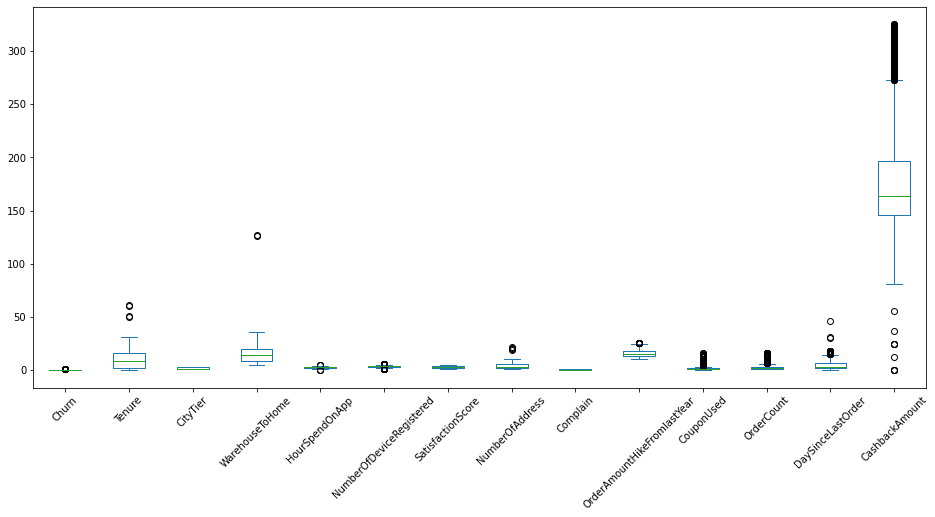

In [16]:
# Outlier detection
num.plot(kind='box',figsize=(16,7))
plt.xticks(rotation=45)
plt.show()

**There’s a quite a lot of features with outliers.**

In [17]:
#Describing numerical columns
num.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00


In [18]:
#Describing categorical columns
category.describe().T

,count,unique,top,freq
PreferredLoginDevice,5630,2,Mobile Phone,3996
PreferredPaymentMode,5630,5,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,5,Mobile Phone,2080
MaritalStatus,5630,3,Married,2986


 And From summary categoricals The unique number of column values is still reasonable, so there is nothing need to drop columns.

# Univariate Analysis

In [19]:
#Finding value counts of categorical variables:
for column in category:
    print("Value count of ",column,"\n")
    print(category[column].value_counts(),"\n""\n")

Value count of  PreferredLoginDevice 

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64 


Value count of  PreferredPaymentMode 

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64 


Value count of  Gender 

Male      3384
Female    2246
Name: Gender, dtype: int64 


Value count of  PreferedOrderCat 

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64 


Value count of  MaritalStatus 

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64 




In [20]:
#Value count of discrete nuerical columns
num1=data[["Churn", "CityTier","HourSpendOnApp","NumberOfDeviceRegistered","Complain",'SatisfactionScore',]]
for column in num1:
    print("Value count of",column,"\n")
    print(num1[column].value_counts(),"\n""\n")

Value count of Churn 

0    4682
1     948
Name: Churn, dtype: int64 


Value count of CityTier 

1    3666
3    1722
2     242
Name: CityTier, dtype: int64 


Value count of HourSpendOnApp 

3.0    2687
2.0    1471
4.0    1176
1.0      35
0.0       3
5.0       3
Name: HourSpendOnApp, dtype: int64 


Value count of NumberOfDeviceRegistered 

4    2377
3    1699
5     881
2     276
1     235
6     162
Name: NumberOfDeviceRegistered, dtype: int64 


Value count of Complain 

0    4026
1    1604
Name: Complain, dtype: int64 


Value count of SatisfactionScore 

3    1698
1    1164
5    1108
4    1074
2     586
Name: SatisfactionScore, dtype: int64 




In [21]:
#Taking churn-wise mean
data.groupby("Churn").mean()

,CustomerID,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,,,,,,,,,,,,,,
0,52829.455575,11.502334,1.619821,15.353931,2.925530,3.639257,3.001282,4.162965,0.234088,15.724893,1.758232,3.046601,4.807406,180.635203
1,52746.575949,3.379469,1.827004,17.134259,2.961798,3.934599,3.390295,4.466245,0.535865,15.627409,1.717021,2.823656,3.236018,160.370928


# Visualisations

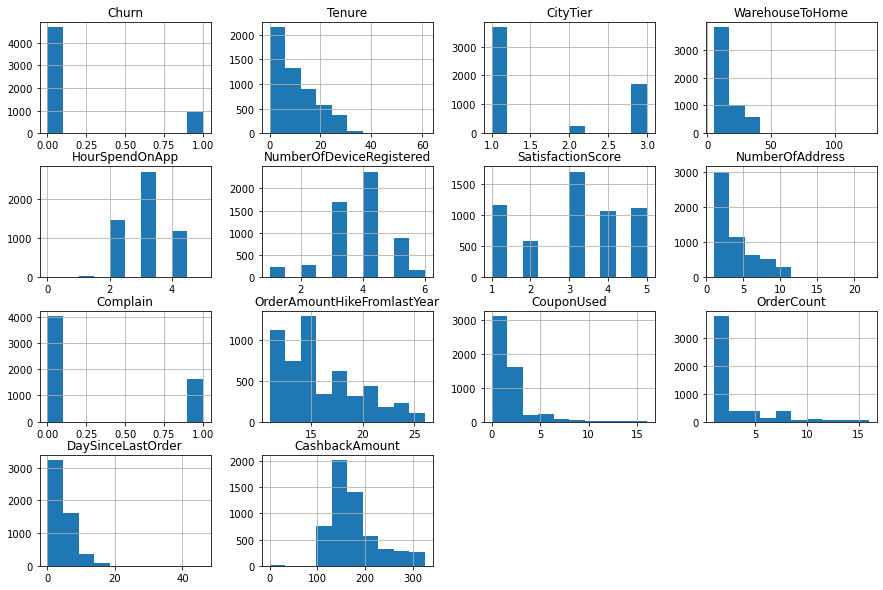

In [22]:
#histogram of numerical variables:
num.hist(figsize=(15,10))
plt.show()

In [23]:
disc = num1.columns # discrete numerical
#disc.append()
cont = set(num.columns).difference(set(num1)) # continuous numerical

In [174]:
disc

Index(['Churn', 'CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'Complain', 'SatisfactionScore'],
      dtype='object')

In [24]:
cont

{'CashbackAmount',
 'CouponUsed',
 'DaySinceLastOrder',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'OrderCount',
 'Tenure',
 'WarehouseToHome'}

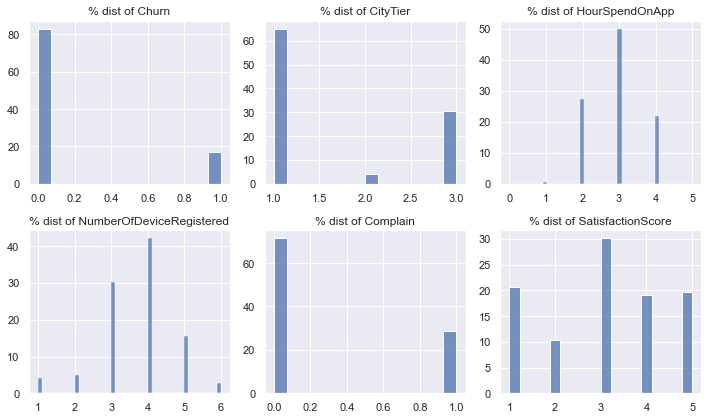

In [25]:
# discrete numerical columns
plt.subplots(figsize=(10, 6))
sns.set(color_codes =True)
for i,col in enumerate(data[disc].columns):
      
    plt.subplot(2,3,i+1)
    plt.layout = (3,3)
    plt.sharex =True
    sns.histplot(data =data, x = col, stat ='percent')
    plt.xlabel("")
    plt.ylabel("")
    plt.title('% dist of '+ col)
    plt.tight_layout()

The following was observed from the above histogram for discrete numerical columns.

- target feature is imbalanced.
- Most customers are in tier 1 city.
- Columns HourSpendOnAPP have mode in 3 hours
- Most customers registered 4 devices.
- Complaints were barely reported by customers
- Majority Satisfaction score is 3 

In [ ]:
# discrete numerical columns
plt.subplots(figsize=(10, 6))
sns.set(color_codes =True)
for i,col in enumerate(data[disc].columns):
      
    plt.subplot(2,3,i+1)
    plt.layout = (3,3)
    plt.sharex =True
    sns.histplot(data =data, x = col, stat ='percent')
    plt.xlabel("")
    plt.ylabel("")
    plt.title('% dist of '+ col)
    plt.tight_layout()

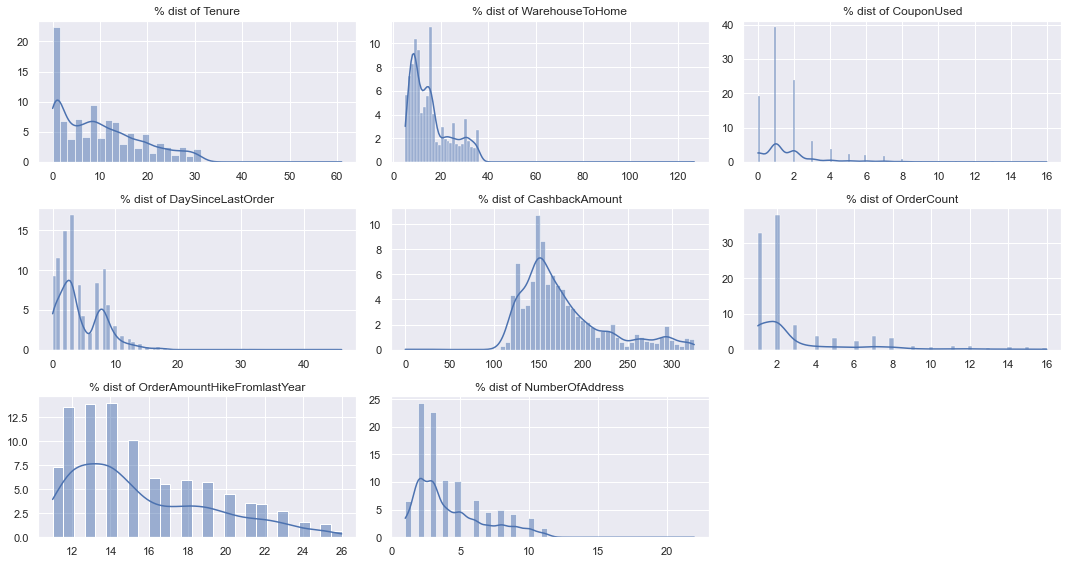

In [26]:
# continuous numerical
plt.subplots(figsize=(15, 8))
sns.set(color_codes =True)
for i,col in enumerate(data[cont].columns):
      
    plt.subplot(3,3,i+1)
    plt.layout = (3,3)
    plt.sharex =True
    sns.histplot(data =data, x = col, stat ='percent', kde =True)
    plt.xlabel("")
    plt.ylabel("")
    plt.title('% dist of '+ col)
    plt.tight_layout()

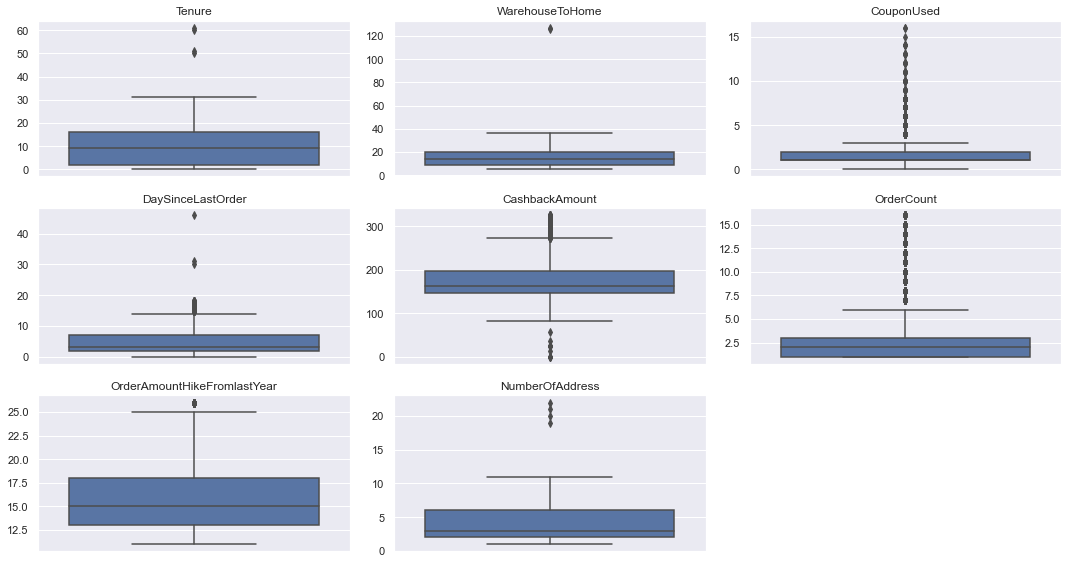

In [27]:
plt.subplots(figsize=(15, 8))
sns.set(color_codes =True)
for i,col in enumerate(data[cont].columns):
      
    plt.subplot(3,3,i+1)
    plt.layout = (3,3)
    plt.sharex =True
    sns.boxplot(data =data, y = col)
    plt.xlabel("")
    plt.ylabel("")
    plt.title( col)
    plt.tight_layout()

- Most of the continuous numerical columns are skewed .Need to apply normalisation befor modelling.
- Data is also skewed and has outliers. Outlier handling to be done.

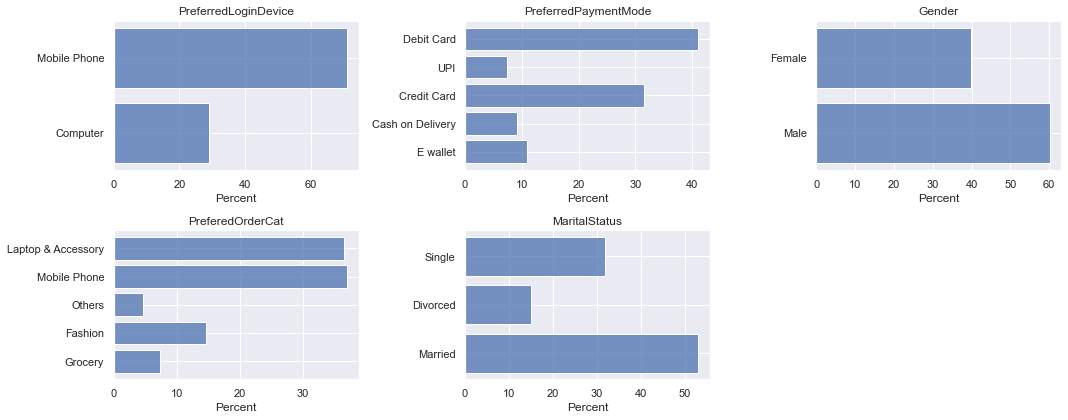

In [28]:
# categorical features
# fig,ax=plt.subplots(3,2)
# fig.set_size_inches(12,15)
# i=0
# for col,i in zip(category,ax.flatten()):
#     sns.countplot(data[col],order=data[col].value_counts(normalize=True).index,ax=i)
#     i.set_title(col.title(),fontsize=20)
#     i.set_xticklabels(data[col].value_counts().index,rotation = 45,fontsize=15)
#     plt.tight_layout()
# plt.subplots(figsize=(10, 6))
# sns.set(color_codes =True)
plt.subplots(figsize=(15, 6))
sns.set(color_codes =True)
for i,col in enumerate(category.columns):
      
    plt.subplot(2,3,i+1)
    plt.layout = (8,8)
    plt.sharex =True
    sns.histplot(data =data, y = col, stat ='percent',shrink=.8,)
    plt.ylabel("")
    plt.title(col)
    plt.tight_layout()

- Mobiles Phones were preferred by most customers
- Most customers chose Debit Card for payment
- Majority of the customers were male
- Laptop and Accessories were the most ordered category

### Target Variable

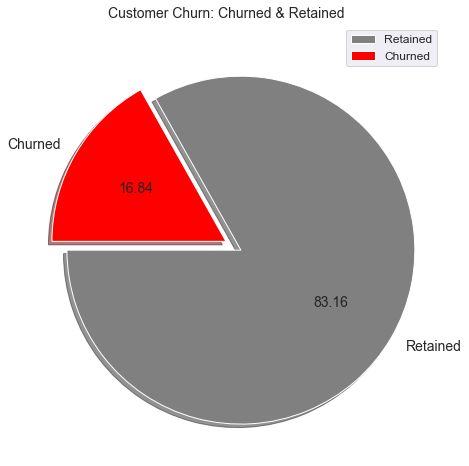

In [29]:
#Pie plot of Target Variable Churn
plt.figure(figsize=(10,8))
plt.pie(data["Churn"].value_counts(),autopct='%.2f',explode=[0.1,0],
        labels=["Retained","Churned"],shadow=True,textprops={'fontsize': 14},
       colors=["gray","red"],startangle=180)
plt.title("Customer Churn: Churned & Retained",fontsize=14)
plt.legend(fontsize=12,loc="upper right")
plt.show()

- This pie chart shows us that by applying value_counts() on churn we can say that the data isnt uniformly distributed in other words it is imbalanced.

## Relation between Target variable and other variables

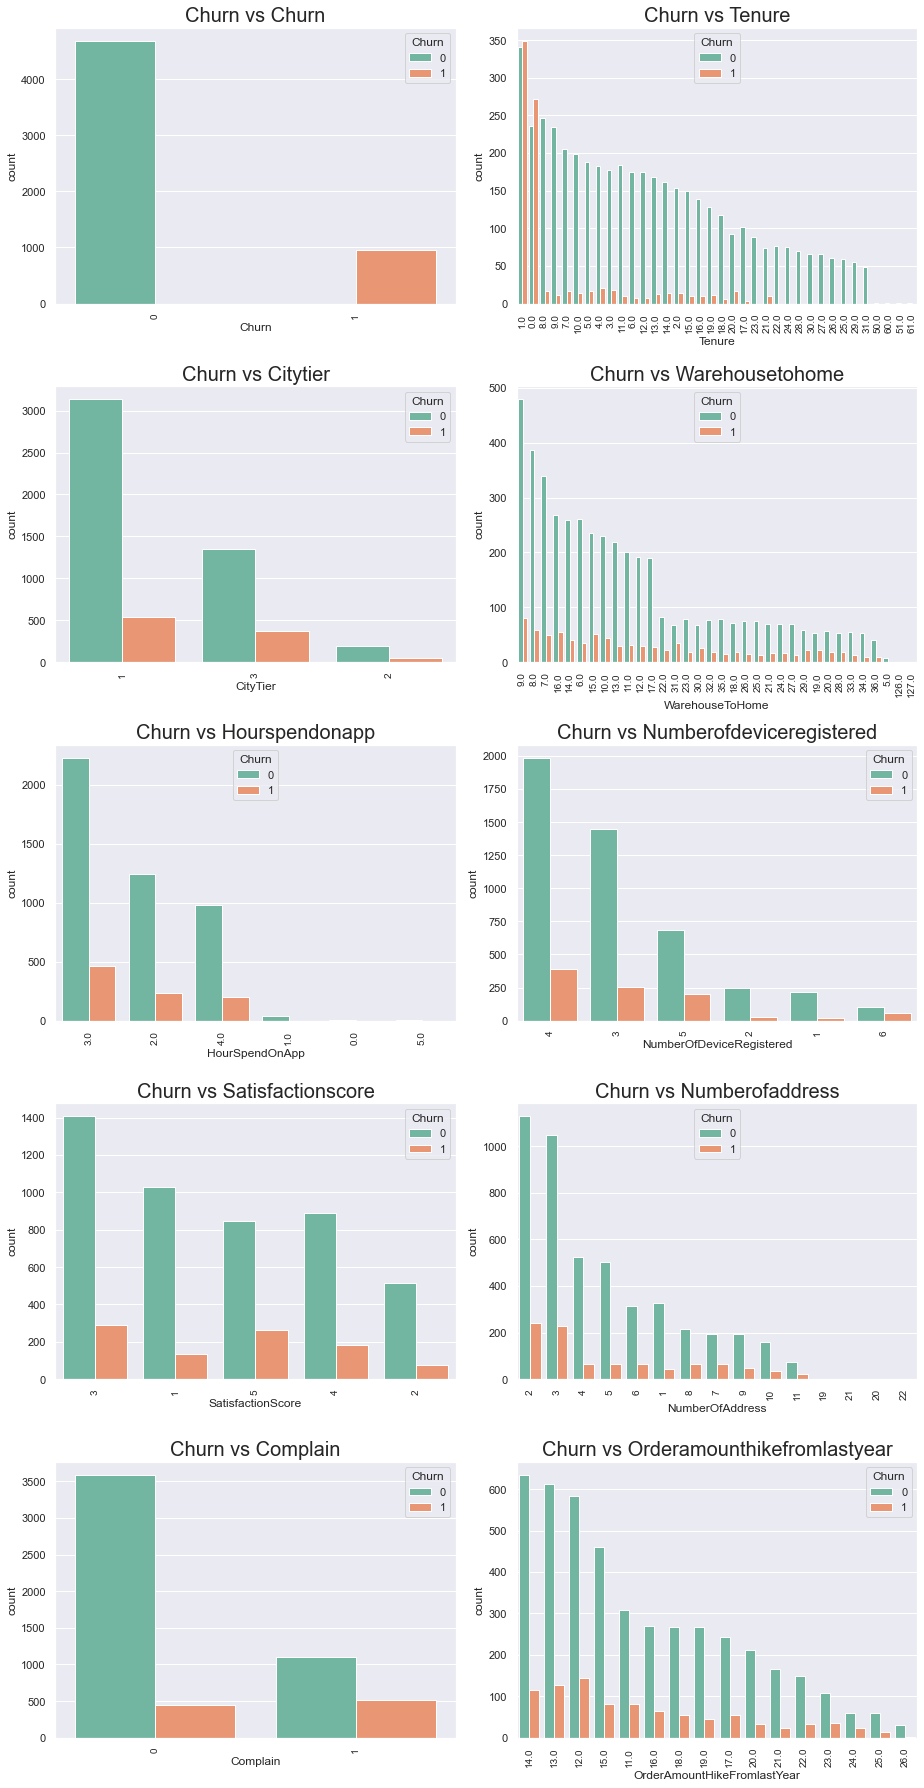

In [30]:
#Numerical columns
fig,ax=plt.subplots(5,2)
fig.set_size_inches(13,25)
i=0
for col,i in zip(num,ax.flatten()):
    #print(col)
    #print(data[col].value_counts(normalize=True).round(2),'\n')
    sns.countplot(data[col],order=data[col].value_counts(normalize=True).index,ax=i,hue=data.Churn,palette='Set2')
    i.set_title("Churn vs "+col.title(),fontsize=20)
    i.set_xticklabels(data[col].value_counts().index,rotation = 90,size=10)
    plt.tight_layout()




- Customers who stayed for more than 22 months are less likely to churn
- Customers in city tier 1 has the highest rate in both churned and retained
- for those who churned Warehouse to home distance is almost uniform.
- ###Customers who spent about 1 hr are least likely to churn
- Most of the customers who retained have average satisfaction score
- Most of the customers who registered 2 addresses are likely to be retained
- Customers with complain have higher churn rate than customers without complain
- Customers with max Order hike have not churned

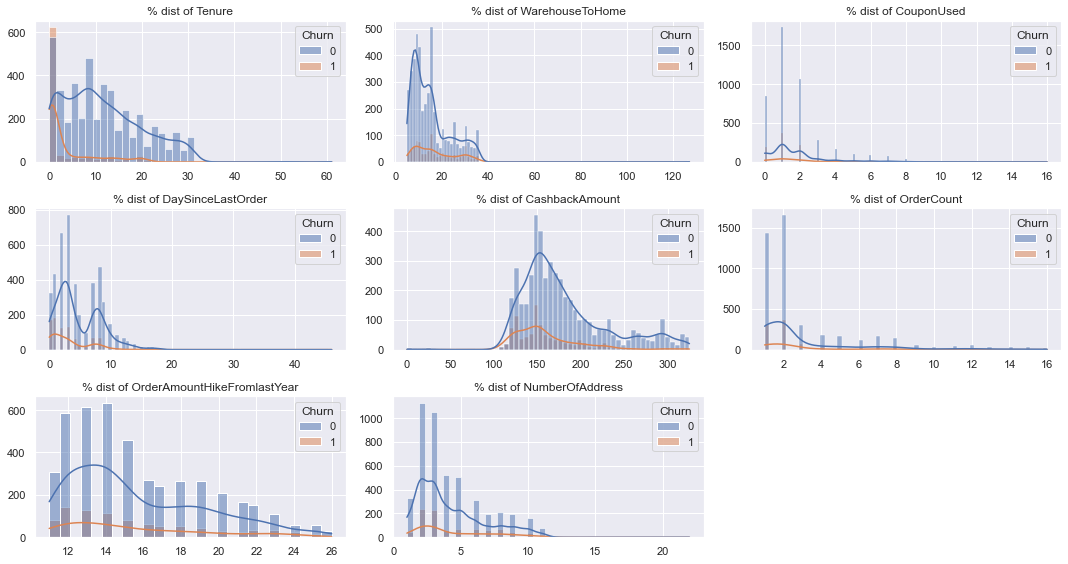

In [31]:
# continuous numerical
plt.subplots(figsize=(15, 8))
sns.set(color_codes =True)
for i,col in enumerate(data[cont].columns):
      
    plt.subplot(3,3,i+1)
    plt.layout = (3,3)
    plt.sharex =True
    sns.histplot(data =data, x = col,hue ='Churn', kde =True)
    plt.xlabel("")
    plt.ylabel("")
    plt.title('% dist of '+ col)
    plt.tight_layout()

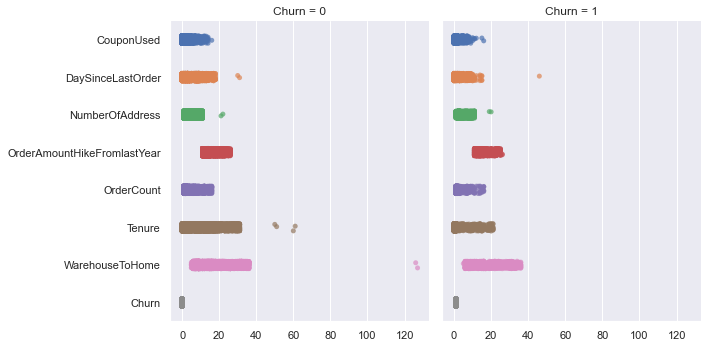

In [32]:
sel = [ 'CouponUsed', 'DaySinceLastOrder', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'OrderCount',
 'Tenure', 'WarehouseToHome','Churn']
sns.catplot(data = data[sel], col ='Churn',orient ='h' ,alpha =.7)

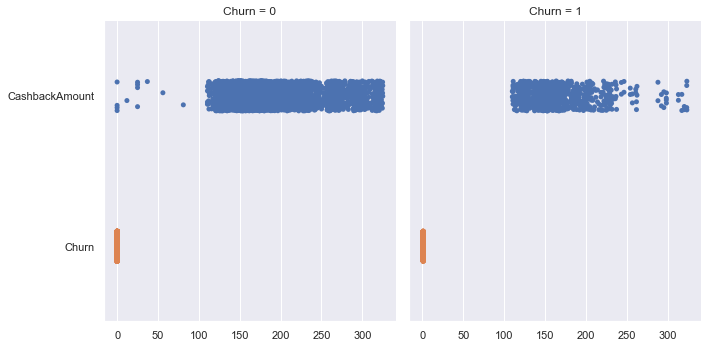

In [33]:
sns.catplot(data = data[['CashbackAmount','Churn']], col ='Churn',orient ='h' )

- All continuous numerical variables has similar pattern of distribution for churn vs not churn .
- For the tenure alone, there is an overlap in distribution for the first few values.
- Churn is less among those with high cash back amount.


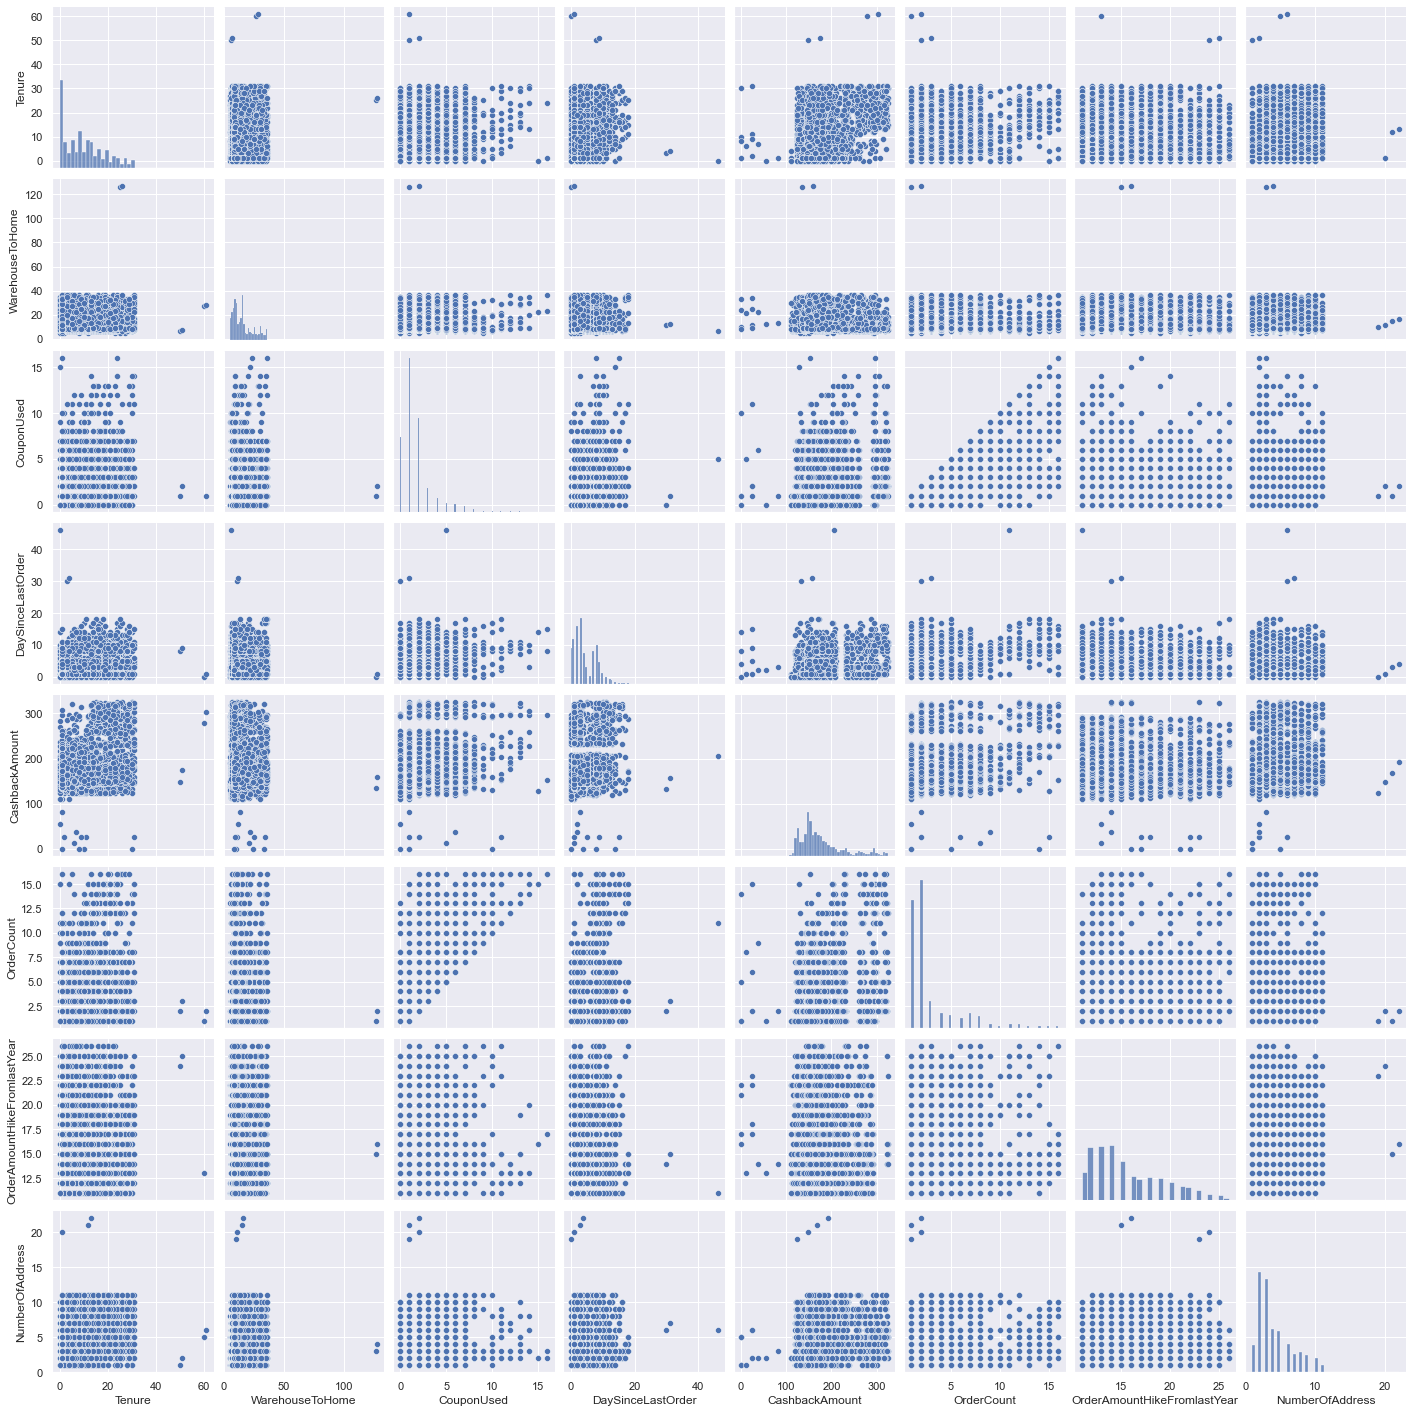

In [34]:
sns.pairplot(data[cont])

The variables are very lightly corelated. Also note that there is some clusters within different range of a variable.

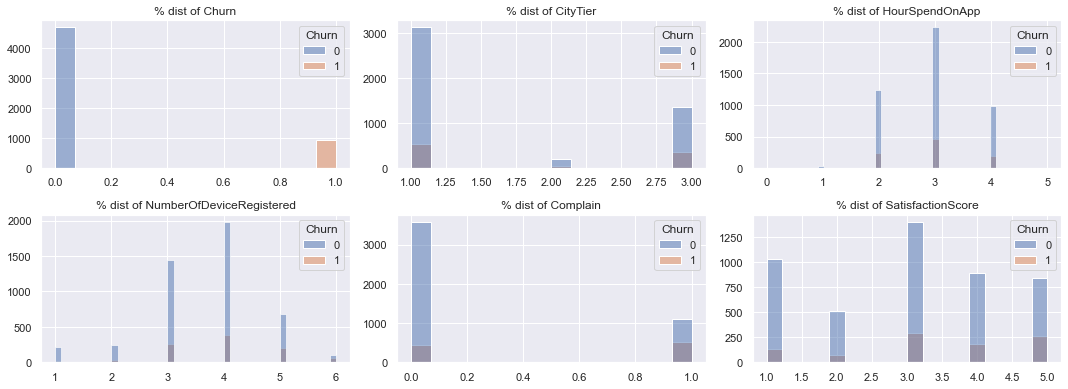

In [35]:
# discrete numerical
plt.subplots(figsize=(15, 8))
sns.set(color_codes =True)
for i,col in enumerate(data[disc].columns):
      
    plt.subplot(3,3,i+1)
    plt.layout = (3,3)
    plt.sharex =True
    sns.histplot(data =data, x = col,hue ='Churn')
    plt.xlabel("")
    plt.ylabel("")
    plt.title('% dist of '+ col)
    plt.tight_layout()

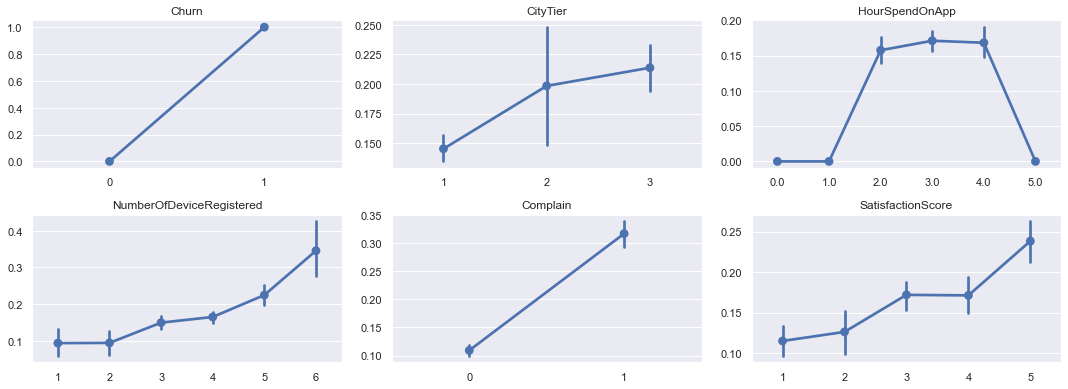

In [36]:
plt.subplots(figsize=(15, 8))
sns.set(color_codes =True)
for i,col in enumerate(data[disc].columns):
      
    plt.subplot(3,3,i+1)
    plt.layout = (3,3)
    plt.sharex =True
    sns.pointplot(data =data, x = col,y ='Churn')
    plt.xlabel("")
    plt.ylabel("")
    plt.title(col)
    plt.tight_layout()

<AxesSubplot:xlabel='CouponUsed', ylabel='Churn'>

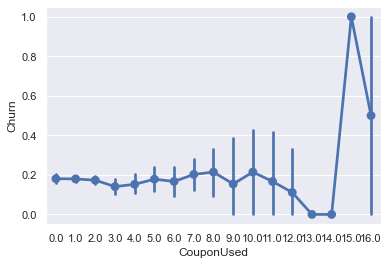

In [37]:
sns.pointplot(data =data, x = 'CouponUsed',y ='Churn')

<AxesSubplot:>

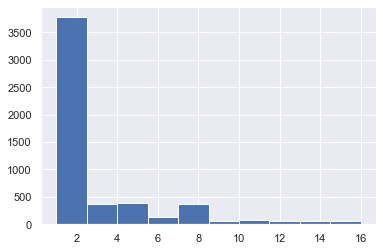

In [38]:
data['OrderCount'].hist()

In [39]:
[1,5,9,12,16]

[1, 5, 9, 12, 16]

In [40]:
data.groupby(['CouponUsed','Churn'])['Churn'].count()

CouponUsed  Churn
0.0         0         844
            1         186
1.0         0        1727
            1         378
2.0         0        1061
            1         222
3.0         0         281
            1          46
4.0         0         167
            1          30
5.0         0         106
            1          23
6.0         0          90
            1          18
7.0         0          71
            1          18
8.0         0          33
            1           9
9.0         0          11
            1           2
10.0        0          11
            1           3
11.0        0          10
            1           2
12.0        0           8
            1           1
13.0        0           8
14.0        0           5
15.0        1           1
16.0        0           1
            1           1
Name: Churn, dtype: int64

- City Tier 2 has less number of data. But churn is less in tier 1 cities.
- Churn distribution is same for people who spend 2,3 or 4 hours .Less curn on 0,1 and 5 hours.
- rate of churn increasing with higher number of devices Registered.
- churn rate is higher among those with complain
- satisfaction score and churn rate is counter intuitive. Churn rate is higher amon those with high satisfaction score.

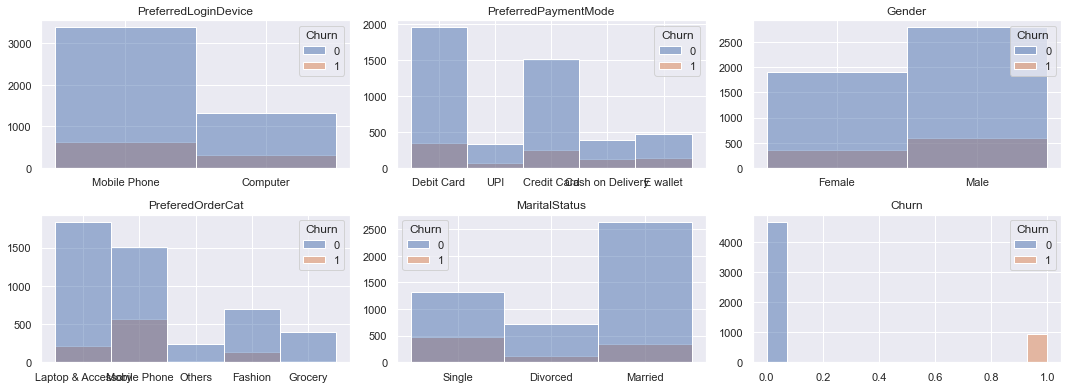

In [41]:
# categorical
cat = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus','Churn']
plt.subplots(figsize=(15, 8))
sns.set(color_codes =True)
for i,col in enumerate(data[cat].columns):
      
    plt.subplot(3,3,i+1)
    plt.layout = (3,3)
    plt.sharex =True
    sns.histplot(data =data, x = col,hue ='Churn')
    plt.xlabel("")
    plt.ylabel("")
    plt.title(col)
    plt.tight_layout()

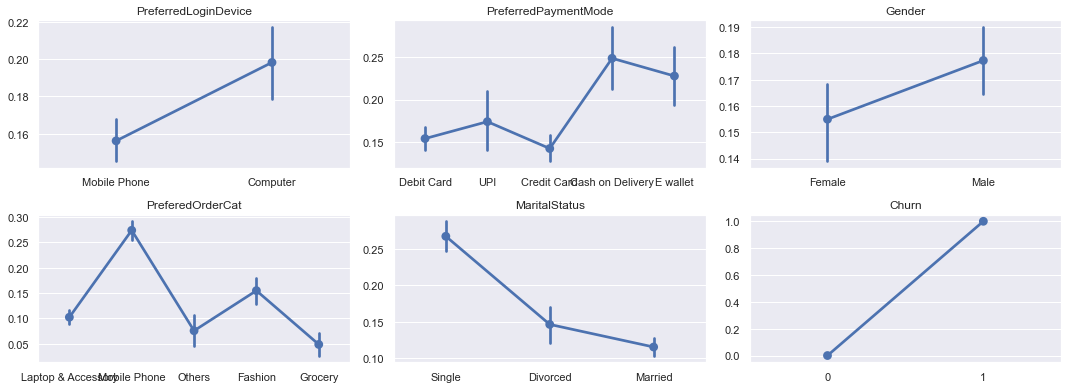

In [42]:
# categoricsl

plt.subplots(figsize=(15, 8))
sns.set(color_codes =True)
for i,col in enumerate(data[cat].columns):
      
    plt.subplot(3,3,i+1)
    plt.layout = (3,3)
    plt.sharex =True
    sns.pointplot(data =data, x = col,y ='Churn')
    plt.xlabel("")
    plt.ylabel("")
    plt.title(col)
    plt.tight_layout()

- Churn rate is high among customers who use Computer to log in
- Cash on delivery has high churn rate
- Churn rate is high among males
- Churn rate high for those customers with prefered order category Mobile.
- Churn rate is highest among single 


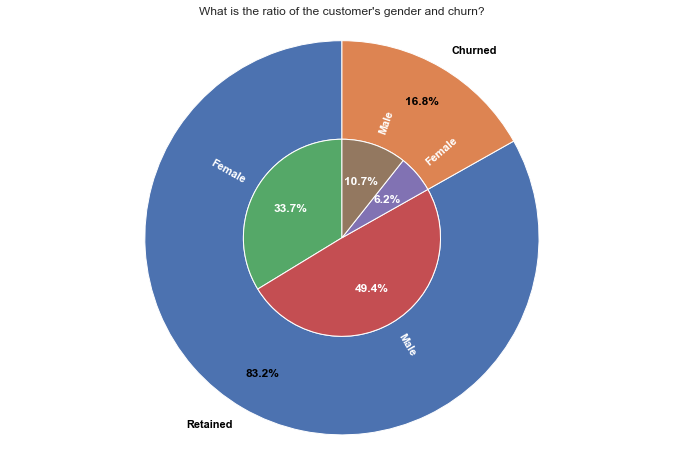

In [43]:
fig, axes2 = plt.subplots(figsize=(12,8))

# Pie chart of churn percentage
width = 0.5

# Percentage of Churned vs Retained
data1 = data.Churn.value_counts().sort_index()
axes2.pie(
    data1,
    labels=['Retained', 'Churned'],
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=90,
    textprops={'color':'black', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1,
)

# Percentage of Gender based on Churn
data2 = data.groupby(["Churn", "Gender"]).size().reset_index()
axes2.pie(
    data2.iloc[:,2], 
    labels=list(data2.Gender),
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1-width,
    rotatelabels=True,
)

axes2.set_title('What is the ratio of the customer\'s gender and churn?')
#axes2.legend(loc='best', bbox_to_anchor=(1,1))
axes2.axis('equal')

plt.show()

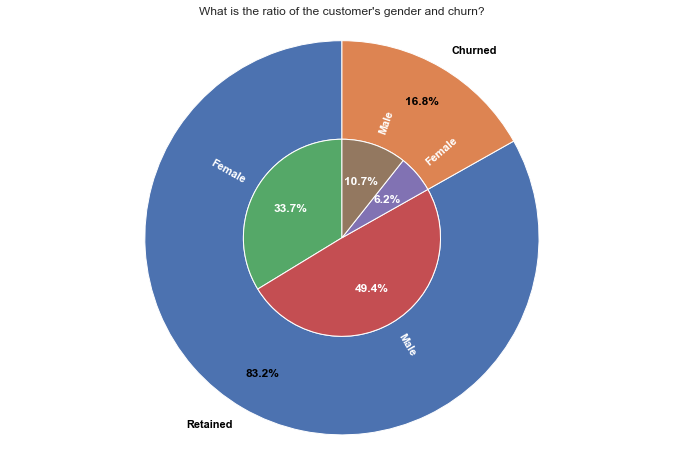

In [44]:
fig, axes2 = plt.subplots(figsize=(12,8))

# Pie chart of churn percentage
width = 0.5

# Percentage of Churned vs Retained
data1 = data.Churn.value_counts().sort_index()
axes2.pie(
    data1,
    labels=['Retained', 'Churned'],
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=90,
    textprops={'color':'black', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1,
)

# Percentage of Gender based on Churn
data2 = data.groupby(["Churn", "Gender"]).size().reset_index()
axes2.pie(
    data2.iloc[:,2], 
    labels=list(data2.Gender),
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1-width,
    rotatelabels=True,
)

axes2.set_title('What is the ratio of the customer\'s gender and churn?')
#axes2.legend(loc='best', bbox_to_anchor=(1,1))
axes2.axis('equal')

plt.show()

### **Male customers churn more than female**

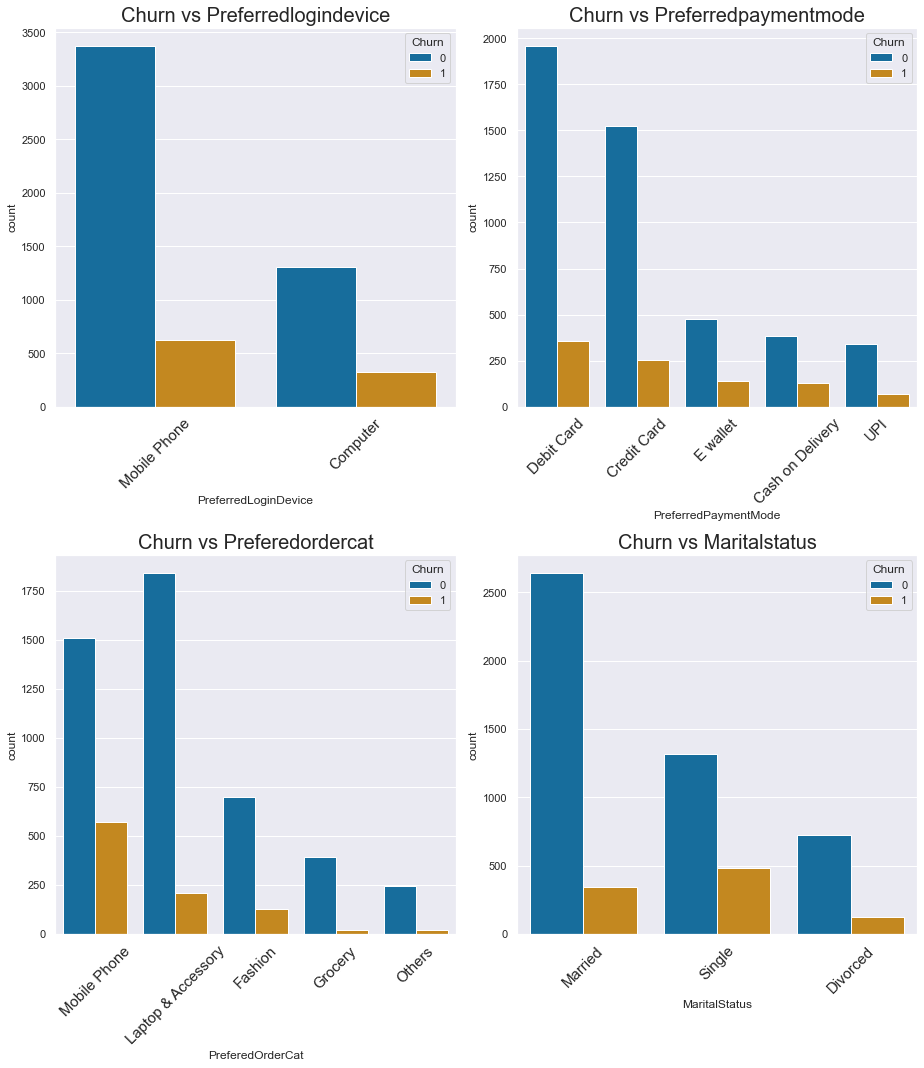

In [45]:
category1=category.drop(['Gender'],axis=1)
fig,ax=plt.subplots(2,2)
fig.set_size_inches(13,15)
i=0
for col,i in zip(category1,ax.flatten()):
    sns.countplot(data[col],order=data[col].value_counts(normalize=True).index,ax=i,hue=data.Churn,palette='colorblind')
    i.set_title("Churn vs "+col.title(),fontsize=20)
    i.set_xticklabels(data[col].value_counts().index,rotation = 45,fontsize=15)
    plt.tight_layout()

- Mobiles Phones were preferred by both customers who churned and retained
- Most customers chose Debit Card for payment
- Churned customers mostly paid through Debit card
- Most Married customers retained while most of the single customers churned
- The most ordered category was Laptop and Accessories for cusomers who didnt churn while mobile phones were for customers who churned

# Bivariate Analysis:

<AxesSubplot:>

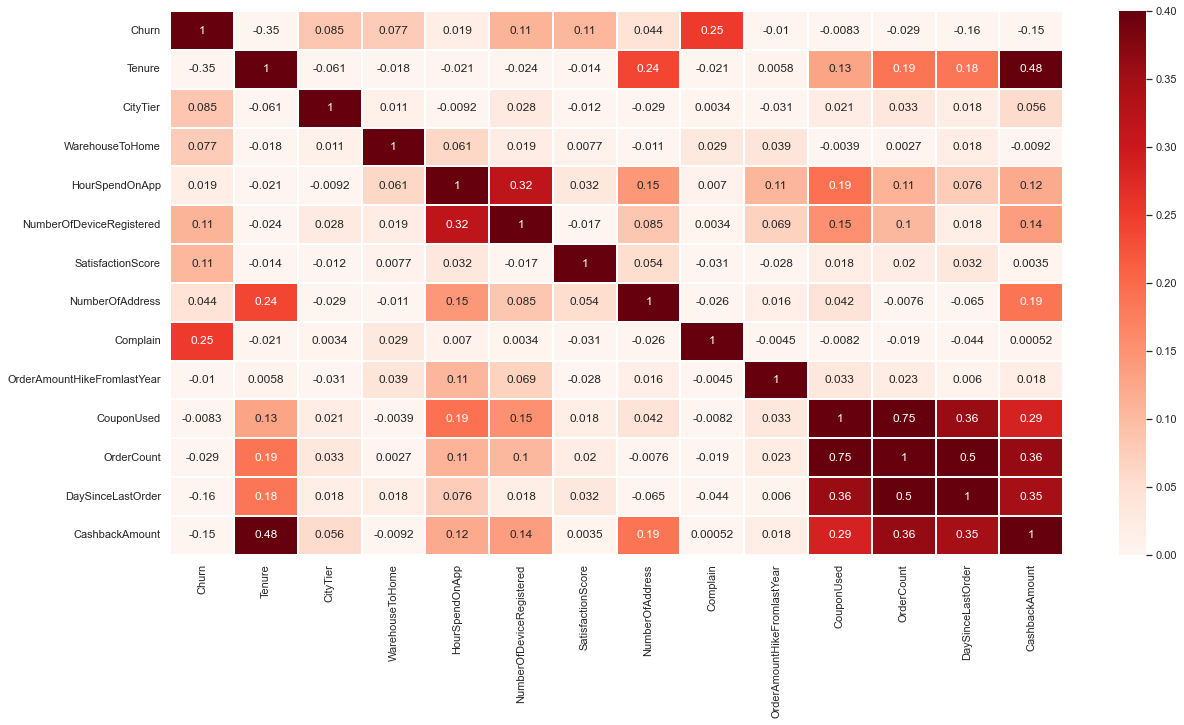

In [46]:
df1 =data.drop('CustomerID', axis =1)
corr=df1.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corr,vmin=-0,vmax=0.4,annot=True,linewidth=0.2,cmap='Reds')

- Order count and Coupon used are inter corelated features. It affect the peformance of certain classification algorithms. Select a robust model which is not much affected by intercorelation.

<AxesSubplot:>

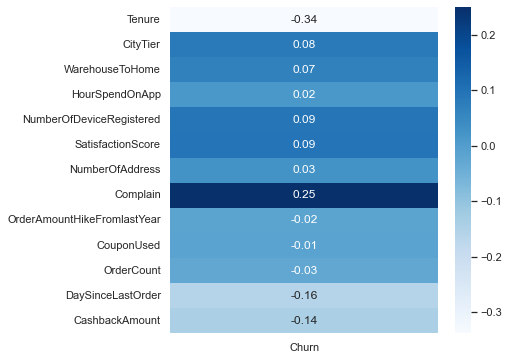

In [47]:
## Create Heatmap Correlation Chart for Each Numerical to Target Features
plt.figure(figsize=(6, 6))
sns.heatmap(df1.corr(method = 'kendall')[df1.corr(method = 'kendall').index != 'Churn'][['Churn']],
            cmap='Blues', annot=True, fmt='.2f')

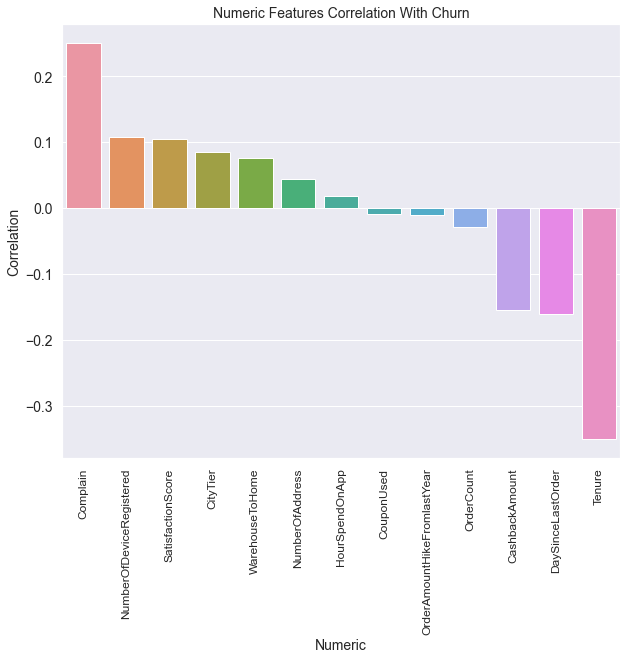

In [48]:
num_cor = data.select_dtypes('number').columns

num_cor = data[num_cor].corr()["Churn"].iloc[2::].reset_index().sort_values("Churn",ascending=False)

#visualisation
plt.figure(figsize=(10,8))
sns.barplot(data=num_cor,y="Churn",x="index")
plt.title("Numeric Features Correlation With Churn",fontsize=14)
plt.xlabel("Numeric",fontsize=14)
plt.xticks(fontsize=12,rotation=90)
plt.ylabel("Correlation",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- Target (Churn) has a Positive correlation with CityTier, WarehouseToHome, NumberOfDeviceRegistered, SatisfactionScore, Complain
- Target (Churn) has a Negative correlation with Tenure, DaySinceLastOrder, and CashbackAmount.
- Target (Churn) with HourSpendOnApp,NumberOfAddress, OrderAmoundHikeFromlastYear, CouponUsed, OrderCount has correlation very weak ~0, this indicates that the feature may not have potential.

<AxesSubplot:xlabel='OrderAmountHikeFromlastYear', ylabel='SatisfactionScore'>

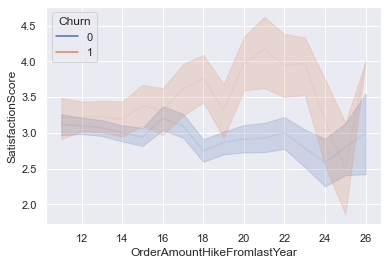

In [49]:
sns.lineplot(data =data, x ='OrderAmountHikeFromlastYear', y ='SatisfactionScore', hue = 'Churn',alpha = .1)

## Missing  Values

In [50]:
data.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [51]:
data.groupby('Churn')['Tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4499.0,11.502334,8.419217,0.0,5.0,10.0,17.0,61.0
1,867.0,3.379469,5.486089,0.0,0.0,1.0,3.0,21.0


In [52]:
# Tenure
# use median to fill null based on Churn

mask1 = (data['Tenure'].isna()) & (data['Churn']==1) # fill 1
mask0 = (data['Tenure'].isna()) & (data['Churn']==0)  # fill 10
data.loc[mask1,'Tenure'] = data[mask1]['Tenure'].fillna(1)
data.loc[mask0,'Tenure'] = data[mask0]['Tenure'].fillna(10)


In [53]:
data['Tenure'].isna().sum()

0

In [54]:
data.groupby('Churn')['WarehouseToHome'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4515.0,15.353931,8.483276,5.0,9.0,13.0,19.0,127.0
1,864.0,17.134259,8.631132,5.0,9.0,15.0,24.0,36.0


In [55]:
mask0 = (data['WarehouseToHome'].isna()) & (data['Churn']==0)  # fill 13
mask1 = (data['WarehouseToHome'].isna()) & (data['Churn']==1) # fill 15
data.loc[mask0,'WarehouseToHome'] = data[mask0]['WarehouseToHome'].fillna(13)
data.loc[mask1,'WarehouseToHome'] = data[mask1]['WarehouseToHome'].fillna(15)


In [56]:
data['WarehouseToHome'].isna().sum()

0

In [57]:
data.groupby('Churn')['HourSpendOnApp'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4485.0,2.925530,0.727184,0.0,2.0,3.0,3.0,5.0
1,890.0,2.961798,0.694427,2.0,2.0,3.0,3.0,4.0


In [58]:
# fill with 3
data ['HourSpendOnApp'] = data['HourSpendOnApp'].fillna(3)
data ['HourSpendOnApp'].isna().sum()

0

In [59]:
data.groupby('Churn')['OrderAmountHikeFromlastYear'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4431.0,15.724893,3.646256,11.0,13.0,15.0,18.0,26.0
1,934.0,15.627409,3.812084,11.0,13.0,14.0,18.0,26.0


In [60]:
# fill with 14.5
data['OrderAmountHikeFromlastYear'] =data['OrderAmountHikeFromlastYear'].fillna(14.5)

In [61]:
data.groupby('Churn')['CouponUsed'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4434.0,1.758232,1.893083,0.0,1.0,1.0,2.0,16.0
1,940.0,1.717021,1.902503,0.0,1.0,1.0,2.0,16.0


In [62]:
# fill with 1
data['CouponUsed'] = data['CouponUsed'].fillna(1)

In [63]:
data.groupby('Churn')['OrderCount'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4442.0,3.046601,2.964982,1.0,1.0,2.0,3.0,16.0
1,930.0,2.823656,2.809924,1.0,1.0,2.0,3.0,16.0


In [64]:
# fill with 2
data['OrderCount']=data['OrderCount'].fillna(2)

In [65]:
data.groupby('Churn')['DaySinceLastOrder'].describe()              

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4429.0,4.807406,3.644758,0.0,2.0,4.0,8.0,31.0
1,894.0,3.236018,3.415137,0.0,1.0,2.0,5.0,46.0


In [66]:
mask0 = (data['DaySinceLastOrder'].isna()) & (data['Churn']==0)  # fill 4
mask1 = (data['DaySinceLastOrder'].isna()) & (data['Churn']==1) # fill 2
data.loc[mask0,'DaySinceLastOrder'] = data[mask0]['DaySinceLastOrder'].fillna(4)
data.loc[mask1,'DaySinceLastOrder'] = data[mask1]['DaySinceLastOrder'].fillna(2)


In [67]:
data.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## Outlier Handling

In [68]:
#checking outliers %
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()/data.shape[0]*100),
            columns = ['outlier %'], index = None). round(2)



,outlier %
CashbackAmount,7.78
Churn,16.84
CityTier,0.00
Complain,0.00
CouponUsed,11.17
CustomerID,0.00
DaySinceLastOrder,1.10
Gender,0.00
HourSpendOnApp,0.11
MaritalStatus,0.00


In [69]:
cont

{'CashbackAmount',
 'CouponUsed',
 'DaySinceLastOrder',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'OrderCount',
 'Tenure',
 'WarehouseToHome'}

In [70]:
out_check = ['CashbackAmount','DaySinceLastOrder', 'OrderAmountHikeFromlastYear', 'Tenure',  'WarehouseToHome']

In [71]:
data['CashbackAmount'].max()

324.99

In [72]:
data['Tenure'].max()

61.0

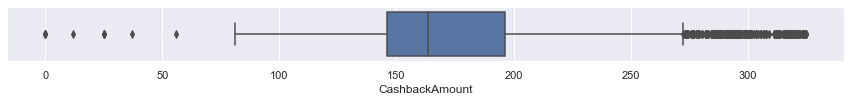

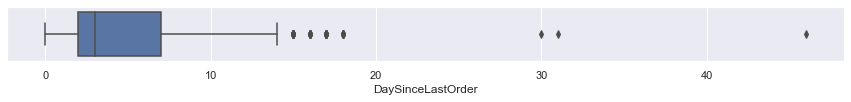

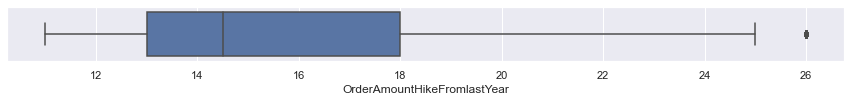

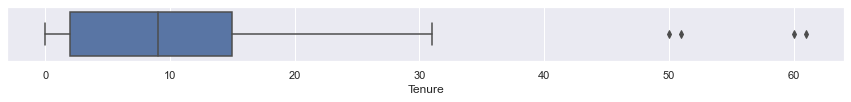

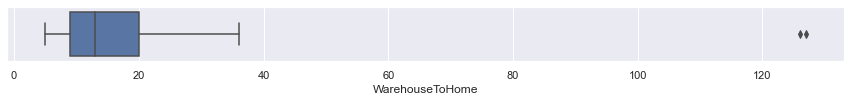

In [73]:
for column in out_check:
    plt.figure(figsize=(15,1))
    sns.boxplot(data=data,x=column)


- 'CashbackAmount' : Details will be retained as such as they are genuine values. Will choose an ML model robust with outliers.
- 'DaySinceLastOrder' : Will be retained as all 3 entries have varied info which is helpful in modelling.
- 'OrderAmountHikeFromlastYear': Many datapoints fall in outlier category, but have varied information. So will be retained.
- 'Tenure' : Will be capped to 30 as all the values above 99 percentile have churn =0
- 'WarehouseToHome' : Will be capped to 36 (99th  percentile) as 2 outlier points are extreme and have churn =0.

In [74]:
data[data['CashbackAmount']<50].groupby('Churn')['Churn'].count()

Churn
0    10
Name: Churn, dtype: int64

In [75]:
data[data['DaySinceLastOrder']>= 20]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1490,51491,0,3.0,Mobile Phone,1,11.0,Cash on Delivery,Female,2.0,3,Mobile Phone,5,Married,6,0,14.0,0.0,2.0,30.0,132.04
2040,52041,1,0.0,Mobile Phone,3,6.0,Debit Card,Male,2.0,4,Fashion,3,Married,6,0,11.0,5.0,11.0,46.0,206.09
4305,54306,0,4.0,Mobile Phone,1,12.0,Cash on Delivery,Female,3.0,4,Mobile Phone,5,Married,7,0,15.0,1.0,3.0,31.0,157.04


In [76]:
data['DaySinceLastOrder'].max()

46.0

In [77]:
data['OrderAmountHikeFromlastYear'].max()

26.0

In [78]:
data[data['OrderAmountHikeFromlastYear']>=26]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2868,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,4.0,229.53
2941,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,2.0,9.0,234.38
2971,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07
3124,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231.48
3366,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165.14
3543,53544,0,1.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Mobile Phone,5,Single,3,0,26.0,1.0,2.0,1.0,150.52
3565,53566,0,18.0,Mobile Phone,1,36.0,UPI,Male,3.0,4,Laptop & Accessory,2,Single,3,0,26.0,2.0,2.0,18.0,170.41
3582,53583,1,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,Mobile Phone,4,Single,3,1,26.0,2.0,2.0,1.0,143.59
3761,53762,0,23.0,Mobile Phone,1,10.0,Credit Card,Female,3.0,5,Laptop & Accessory,5,Divorced,6,0,26.0,2.0,2.0,3.0,172.89
3765,53766,0,6.0,Mobile Phone,1,17.0,Credit Card,Male,1.0,4,Fashion,1,Single,4,0,26.0,1.0,2.0,1.0,237.44


In [79]:
data[data['Tenure']>30]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
928,50929,0,50.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,1,Laptop & Accessory,3,Divorced,1,0,24.0,1.0,2.0,8.0,149.00
2719,52720,0,60.0,Mobile Phone,3,27.0,Debit Card,Female,3.0,3,Grocery,1,Married,5,1,13.0,1.0,1.0,0.0,278.75
2847,52848,0,31.0,Mobile Phone,1,16.0,Credit Card,Female,4.0,5,Mobile Phone,4,Divorced,6,1,21.0,2.0,2.0,1.0,158.46
2853,52854,0,31.0,Mobile Phone,1,31.0,Debit Card,Male,3.0,3,Fashion,2,Married,5,1,17.0,2.0,2.0,4.0,219.39
2915,52916,0,31.0,Mobile Phone,1,10.0,Debit Card,Male,4.0,5,Mobile Phone,2,Divorced,5,0,18.0,1.0,2.0,1.0,146.77
2922,52923,0,31.0,Mobile Phone,2,13.0,Credit Card,Male,3.0,4,Mobile Phone,3,Divorced,10,0,18.0,3.0,3.0,3.0,147.67
2998,52999,0,31.0,Computer,1,7.0,Debit Card,Male,3.0,6,Laptop & Accessory,3,Married,4,1,14.0,2.0,2.0,3.0,181.60
3050,53051,0,31.0,Mobile Phone,1,7.0,Credit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,4,0,12.0,2.0,2.0,3.0,192.55
3101,53102,0,31.0,Mobile Phone,1,14.0,Debit Card,Female,3.0,4,Others,5,Divorced,7,0,14.5,1.0,12.0,11.0,320.66
3114,53115,0,31.0,Mobile Phone,3,36.0,E wallet,Male,3.0,5,Grocery,2,Married,5,0,13.0,1.0,2.0,1.0,266.18


In [80]:
np.percentile(data['Tenure'],99)

30.0

In [81]:
data['Tenure'] = np.where(data['Tenure'] > 30,30,data['Tenure'])


In [82]:
data['WarehouseToHome'].max()

127.0

In [83]:
data[data['WarehouseToHome']>36]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1309,51310,0,25.0,Computer,3,126.0,Debit Card,Male,2.0,3,Mobile Phone,1,Married,3,0,15.0,1.0,1.0,0.0,134.82
4124,54125,0,26.0,Computer,3,127.0,Debit Card,Male,3.0,4,Mobile Phone,1,Married,4,0,16.0,2.0,2.0,1.0,159.82


In [84]:
q1,q3 = np.percentile(data['WarehouseToHome'],[25,75])
iqr = q3-1
ul = q3 = 1.5*iqr
ul , np.percentile(data['WarehouseToHome'],99)

(28.5, 35.0)

In [85]:
data['WarehouseToHome'] = np.where(data['WarehouseToHome'] > 36, 36,data['WarehouseToHome'])

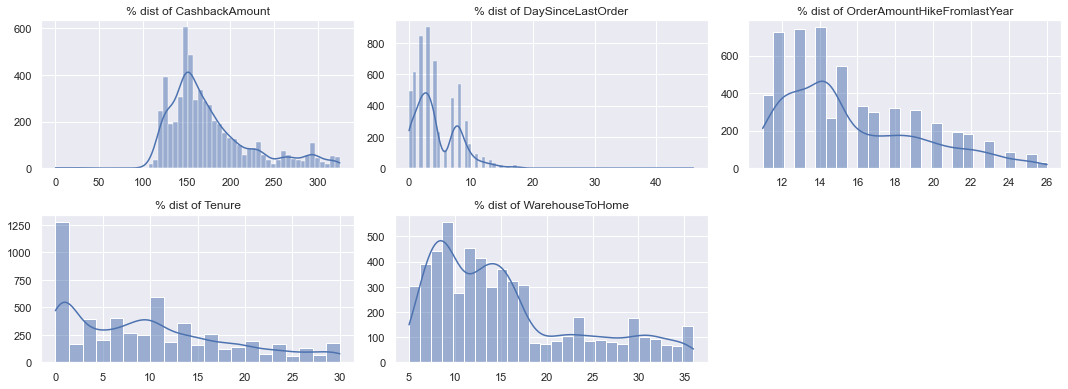

In [86]:
plt.subplots(figsize=(15, 8))
sns.set(color_codes =True)
for i,col in enumerate(data[out_check].columns):
      
    plt.subplot(3,3,i+1)
    plt.layout = (3,3)
    plt.sharex =True
    sns.histplot(data =data, x = col, kde =True)
    plt.xlabel("")
    plt.ylabel("")
    plt.title('% dist of '+ col)
    plt.tight_layout()

## Encoding

In [87]:
category.describe().T

,count,unique,top,freq
PreferredLoginDevice,5630,2,Mobile Phone,3996
PreferredPaymentMode,5630,5,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,5,Mobile Phone,2080
MaritalStatus,5630,3,Married,2986


In [88]:
#['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

In [89]:
from sklearn.preprocessing import OneHotEncoder
enc_drop = OneHotEncoder(drop= 'first')
enc_drop.fit(category)

OneHotEncoder(drop='first')

In [90]:
import joblib
joblib.dump(enc_drop, 'oneHotEnc.sav')

['oneHotEnc.sav']

In [91]:
# get the on hot encoded feature names
enc_drop.get_feature_names(category.columns)

array(['PreferredLoginDevice_Mobile Phone',
       'PreferredPaymentMode_Credit Card',
       'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'Gender_Male',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Married', 'MaritalStatus_Single'], dtype=object)

In [92]:
# apply one hot to data, and join encoded columns with data
encoded = enc_drop.transform(category).toarray()
#enc.inverse_transform(encoded)
df_enc = data.join(pd.DataFrame(encoded,columns =['PreferredLoginDevice_Mobile Phone',
       'PreferredPaymentMode_Credit Card',
       'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'Gender_Male',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Married', 'MaritalStatus_Single'] ))
df_enc.shape

(5630, 32)

In [93]:
df_enc =df_enc.drop(['PreferredLoginDevice','PreferredPaymentMode', 'Gender',
       'PreferedOrderCat','MaritalStatus'],axis=1)

In [94]:
df_enc['Tenure_year'] = df_enc['Tenure']/12

##  Data Scaling and transformation

## Scaling

In [95]:
df_enc.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.250000,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.000000,0.00,0.0000,1.00
Tenure,5630.0,10.024689,8.332446,0.0,2.000000,9.00,15.0000,30.00
CityTier,5630.0,1.654707,0.915389,1.0,1.000000,1.00,3.0000,3.00
WarehouseToHome,5630.0,15.519893,8.094412,5.0,9.000000,13.00,20.0000,36.00
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.000000,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.000000,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.000000,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.000000,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.000000,0.00,1.0000,1.00


In [96]:
# Feature scaling using RobustScaler
from sklearn.preprocessing import RobustScaler

In [97]:
scale = ['Tenure',  'WarehouseToHome','OrderAmountHikeFromlastYear','DaySinceLastOrder', 'CashbackAmount']

In [98]:
X = df_enc.drop(['Churn', 'CustomerID'], axis =1)
robScale = RobustScaler()
robScale.fit(X[scale])
X[scale] = pd.DataFrame(robScale.transform(X[scale]), columns = X[scale].columns)
import joblib
joblib.dump(robScale, 'scaler.sav')


['scaler.sav']

In [99]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,0.078822,0.640957,-0.692308,-0.538462,0.00,0.461538,1.615385
CityTier,5630.0,1.654707,0.915389,1.000000,1.000000,1.00,3.000000,3.000000
WarehouseToHome,5630.0,0.229081,0.735856,-0.727273,-0.363636,0.00,0.636364,2.090909
HourSpendOnApp,5630.0,2.934636,0.705528,0.000000,2.000000,3.00,3.000000,5.000000
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.000000,3.000000,4.00,4.000000,6.000000
SatisfactionScore,5630.0,3.066785,1.380194,1.000000,2.000000,3.00,4.000000,5.000000
NumberOfAddress,5630.0,4.214032,2.583586,1.000000,2.000000,3.00,6.000000,22.000000
Complain,5630.0,0.284902,0.451408,0.000000,0.000000,0.00,1.000000,1.000000
OrderAmountHikeFromlastYear,5630.0,0.230213,0.719407,-0.700000,-0.300000,0.00,0.700000,2.300000
CouponUsed,5630.0,1.716874,1.857640,0.000000,1.000000,1.00,2.000000,16.000000


In [100]:
X['NumberOfAddress'].max()

22

In [101]:
X['NumberOfAddressBin'] = pd.cut(X['NumberOfAddress'], bins=[0, 3, 7, 25], labels = ['low','med','high'] )
X['NumberOfAddressBin'].isna().sum()

0

In [102]:
X['CouponUsedBin'] = pd.cut(X['CouponUsed'], bins=[-1, 0, 1, 2, 20], labels = ['zero','low','med','high'] )
X['CouponUsedBin'].isna().sum()

0

In [103]:
X['OrderCountBin'] = pd.cut(X['OrderCount'], bins=[ 0, 1, 2,3, 20], labels = ['zero','low','med','high'] )
X['OrderCountBin'].isna().sum()

0

In [104]:
X.dtypes

Tenure                                  float64
CityTier                                  int64
WarehouseToHome                         float64
HourSpendOnApp                          float64
NumberOfDeviceRegistered                  int64
SatisfactionScore                         int64
NumberOfAddress                           int64
Complain                                  int64
OrderAmountHikeFromlastYear             float64
CouponUsed                              float64
OrderCount                              float64
DaySinceLastOrder                       float64
CashbackAmount                          float64
PreferredLoginDevice_Mobile Phone       float64
PreferredPaymentMode_Credit Card        float64
PreferredPaymentMode_Debit Card         float64
PreferredPaymentMode_E wallet           float64
PreferredPaymentMode_UPI                float64
Gender_Male                             float64
PreferedOrderCat_Grocery                float64
PreferedOrderCat_Laptop & Accessory     

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for f in ['NumberOfAddressBin','CouponUsedBin', 'OrderCountBin' ]:
    X[f] = le.fit_transform(X[f])

In [106]:
X.drop(['NumberOfAddress','CouponUsed', 'OrderCount' ], axis =1, inplace =True)

In [107]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,0.078822,0.640957,-0.692308,-0.538462,0.00,0.461538,1.615385
CityTier,5630.0,1.654707,0.915389,1.000000,1.000000,1.00,3.000000,3.000000
WarehouseToHome,5630.0,0.229081,0.735856,-0.727273,-0.363636,0.00,0.636364,2.090909
HourSpendOnApp,5630.0,2.934636,0.705528,0.000000,2.000000,3.00,3.000000,5.000000
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.000000,3.000000,4.00,4.000000,6.000000
SatisfactionScore,5630.0,3.066785,1.380194,1.000000,2.000000,3.00,4.000000,5.000000
Complain,5630.0,0.284902,0.451408,0.000000,0.000000,0.00,1.000000,1.000000
OrderAmountHikeFromlastYear,5630.0,0.230213,0.719407,-0.700000,-0.300000,0.00,0.700000,2.300000
DaySinceLastOrder,5630.0,0.298934,0.712726,-0.600000,-0.200000,0.00,0.800000,8.600000
CashbackAmount,5630.0,0.275431,0.972039,-3.225443,-0.345894,0.00,0.654106,3.194429


### log transformation

In [108]:
def get_log(feature,df):
    df[feature +'_log'] = np.log(df[feature]+1)
    
    plt.subplots(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    
    sns.histplot(data = df, x = feature)
    plt.title("before ")

    plt.subplot(1, 2, 2)
    sns.histplot(data = df, x =feature+'_log' )
    plt.title("after ")

        

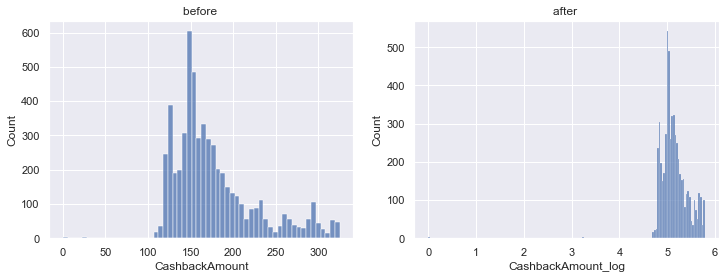

In [109]:
get_log('CashbackAmount',df_enc)

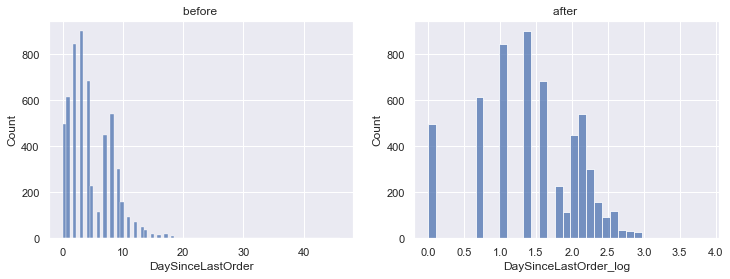

In [110]:
get_log('DaySinceLastOrder',df_enc)

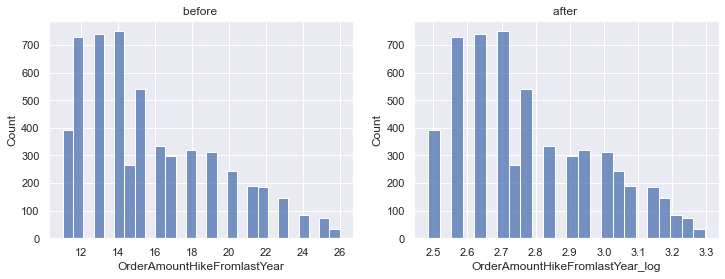

In [111]:
 get_log('OrderAmountHikeFromlastYear',df_enc)

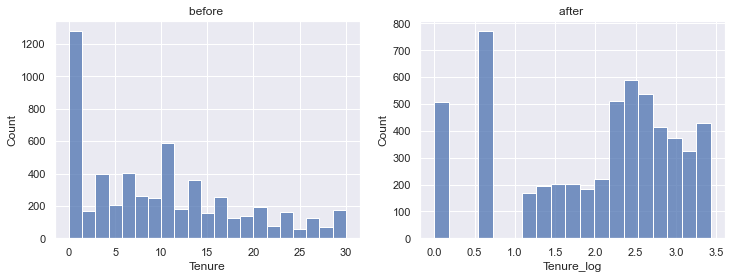

In [112]:
get_log('Tenure',df_enc)


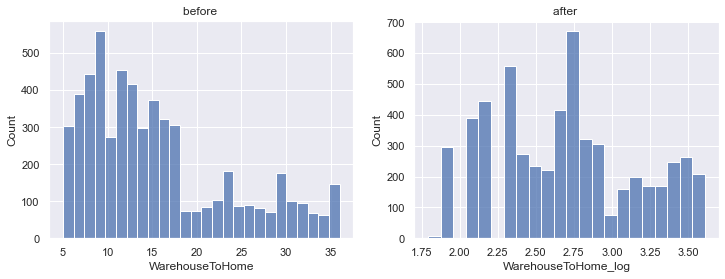

In [113]:
get_log( 'WarehouseToHome', df_enc)

In [114]:
# Check Scaling after log transfer 
X_log = df_enc.drop(['Churn', 'CustomerID'], axis =1)


In [115]:
X.shape

(5630, 26)

In [116]:
X_log = X_log.drop(['CashbackAmount',
 'DaySinceLastOrder',
 'OrderAmountHikeFromlastYear',
  'Tenure',
 'WarehouseToHome' ], axis =1)
X_log.describe().T

,count,mean,std,min,25%,50%,75%,max
CityTier,5630.0,1.654707,0.915389,1.000000,1.000000,1.000000,3.000000,3.000000
HourSpendOnApp,5630.0,2.934636,0.705528,0.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5630.0,3.066785,1.380194,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5630.0,4.214032,2.583586,1.000000,2.000000,3.000000,6.000000,22.000000
Complain,5630.0,0.284902,0.451408,0.000000,0.000000,0.000000,1.000000,1.000000
CouponUsed,5630.0,1.716874,1.857640,0.000000,1.000000,1.000000,2.000000,16.000000
OrderCount,5630.0,2.961812,2.879248,1.000000,1.000000,2.000000,3.000000,16.000000
PreferredLoginDevice_Mobile Phone,5630.0,0.709769,0.453909,0.000000,0.000000,1.000000,1.000000,1.000000
PreferredPaymentMode_Credit Card,5630.0,0.315098,0.464596,0.000000,0.000000,0.000000,1.000000,1.000000


In [117]:
# will add the binned features 
X_log['NumberOfAddressBin'] =X['NumberOfAddressBin']
X_log['CouponUsedBin'] = X['CouponUsedBin']
X_log['OrderCountBin'] = X['OrderCountBin']

In [118]:
X_log.drop(['NumberOfAddress','CouponUsed', 'OrderCount' ], axis =1, inplace =True)

In [119]:
X_log.describe().T

,count,mean,std,min,25%,50%,75%,max
CityTier,5630.0,1.654707,0.915389,1.000000,1.000000,1.000000,3.000000,3.000000
HourSpendOnApp,5630.0,2.934636,0.705528,0.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5630.0,3.066785,1.380194,1.000000,2.000000,3.000000,4.000000,5.000000
Complain,5630.0,0.284902,0.451408,0.000000,0.000000,0.000000,1.000000,1.000000
PreferredLoginDevice_Mobile Phone,5630.0,0.709769,0.453909,0.000000,0.000000,1.000000,1.000000,1.000000
PreferredPaymentMode_Credit Card,5630.0,0.315098,0.464596,0.000000,0.000000,0.000000,1.000000,1.000000
PreferredPaymentMode_Debit Card,5630.0,0.411012,0.492061,0.000000,0.000000,0.000000,1.000000,1.000000
PreferredPaymentMode_E wallet,5630.0,0.109059,0.311740,0.000000,0.000000,0.000000,0.000000,1.000000
PreferredPaymentMode_UPI,5630.0,0.073535,0.261035,0.000000,0.000000,0.000000,0.000000,1.000000


## Boxcox

In [120]:
from scipy.stats import boxcox
def get_boxcox(feature,df):
    df[feature +'_box'] = boxcox(df[feature]+1)[0]
    
    plt.subplots(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    
    sns.histplot(data = df, x = feature)
    plt.title("before ")

    plt.subplot(1, 2, 2)
    sns.histplot(data = df, x =feature+'_box' )
    plt.title("after ")    

In [121]:
df_bx = df_enc.copy()
df_bx.drop(['CashbackAmount_log',
       'DaySinceLastOrder_log', 'OrderAmountHikeFromlastYear_log',
       'Tenure_log', 'WarehouseToHome_log'], axis =1, inplace =True)
df_bx.columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_Credit Card',
       'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Tenure_year'],
      dtype='object')

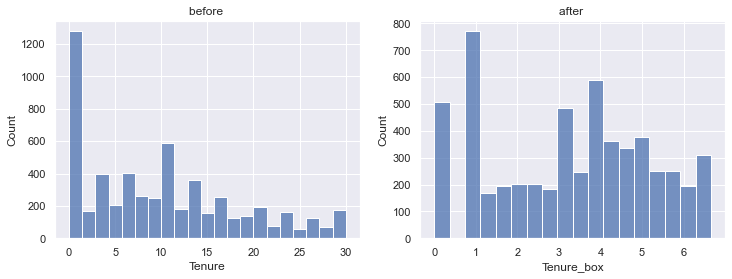

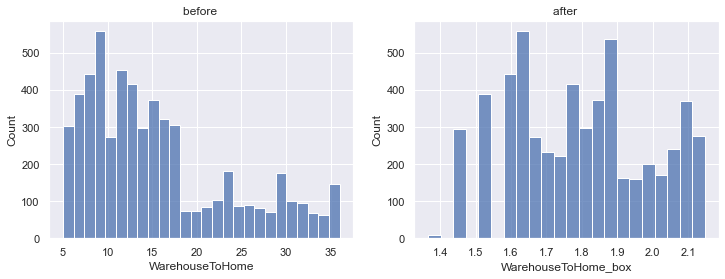

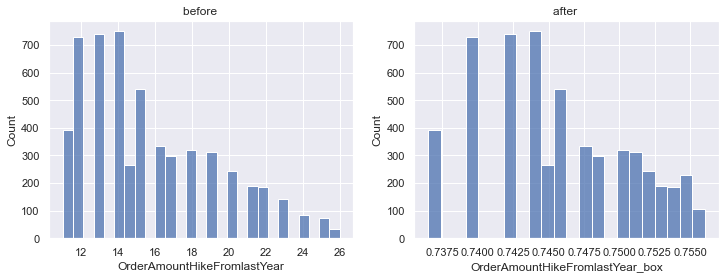

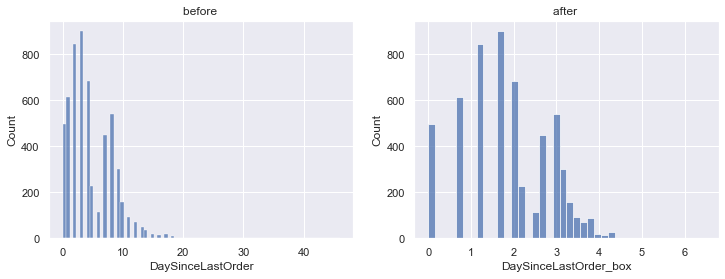

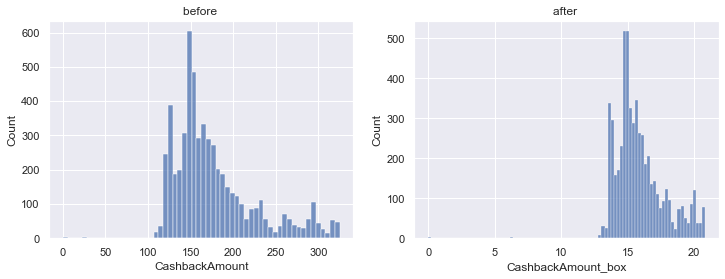

In [122]:
for f in scale:
    #plt.subplots(i+1)
    get_boxcox(f, df_bx)

In [123]:
df_bx.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.000000,51408.250000,52815.500000,54222.750000,55630.000000
Churn,5630.0,0.168384,0.374240,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5630.0,10.024689,8.332446,0.000000,2.000000,9.000000,15.000000,30.000000
CityTier,5630.0,1.654707,0.915389,1.000000,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,5630.0,15.519893,8.094412,5.000000,9.000000,13.000000,20.000000,36.000000
HourSpendOnApp,5630.0,2.934636,0.705528,0.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5630.0,3.066785,1.380194,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5630.0,4.214032,2.583586,1.000000,2.000000,3.000000,6.000000,22.000000
Complain,5630.0,0.284902,0.451408,0.000000,0.000000,0.000000,1.000000,1.000000


In [124]:
df_bx['CashbackAmount'].quantile(.001)

25.0

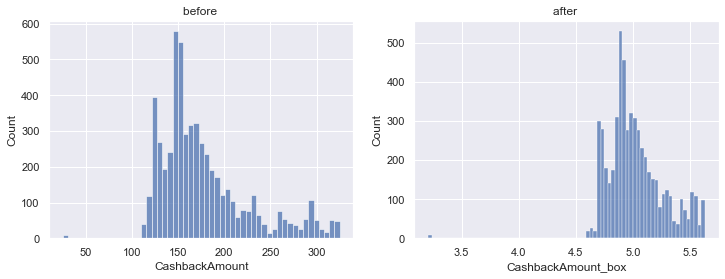

In [125]:
# Cashback amount is on a higher scale after boxcox, so will cap and do boxcox
df_bx['CashbackAmount'] = np.where(df_bx['CashbackAmount']<25, 25, df_bx['CashbackAmount'])
get_boxcox('CashbackAmount', df_bx)

In [126]:
X_bx = df_bx.drop(['CustomerID','Churn','CashbackAmount','DaySinceLastOrder','OrderAmountHikeFromlastYear', 'Tenure',
                   'WarehouseToHome'], axis =1)
X_bx['NumberOfAddressBin'] =X['NumberOfAddressBin']
X_bx['CouponUsedBin'] = X['CouponUsedBin']
X_bx['OrderCountBin'] = X['OrderCountBin']

In [127]:
X_bx.drop(['NumberOfAddress','CouponUsed', 'OrderCount' ], axis =1, inplace =True)

In [128]:
X_bx.describe().T

,count,mean,std,min,25%,50%,75%,max
CityTier,5630.0,1.654707,0.915389,1.000000,1.000000,1.000000,3.000000,3.000000
HourSpendOnApp,5630.0,2.934636,0.705528,0.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5630.0,3.066785,1.380194,1.000000,2.000000,3.000000,4.000000,5.000000
Complain,5630.0,0.284902,0.451408,0.000000,0.000000,0.000000,1.000000,1.000000
PreferredLoginDevice_Mobile Phone,5630.0,0.709769,0.453909,0.000000,0.000000,1.000000,1.000000,1.000000
PreferredPaymentMode_Credit Card,5630.0,0.315098,0.464596,0.000000,0.000000,0.000000,1.000000,1.000000
PreferredPaymentMode_Debit Card,5630.0,0.411012,0.492061,0.000000,0.000000,0.000000,1.000000,1.000000
PreferredPaymentMode_E wallet,5630.0,0.109059,0.311740,0.000000,0.000000,0.000000,0.000000,1.000000
PreferredPaymentMode_UPI,5630.0,0.073535,0.261035,0.000000,0.000000,0.000000,0.000000,1.000000


<AxesSubplot:>

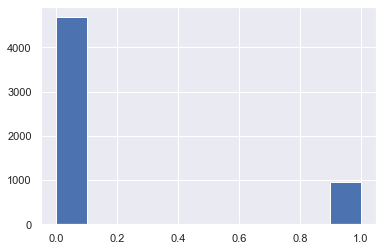

In [129]:

y = df_enc['Churn']
y.hist()

In [130]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [131]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn import under_sampling, over_sampling
#X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X_log, y)


In [132]:
#X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)

X_robsc, y_robsc = over_sampling.SMOTE(0.5).fit_resample(X, y)

In [133]:
X_log, y_log = over_sampling.SMOTE(0.5).fit_resample(X_log, y)

In [134]:
X_bx, y_bx = over_sampling.SMOTE(0.5).fit_resample(X_bx, y)

array([[<AxesSubplot:title={'center':'Churn'}>]], dtype=object)

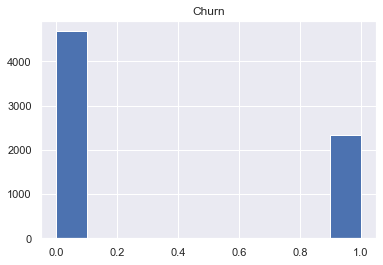

In [135]:
y_smote = pd.DataFrame(y_robsc,columns =['Churn'])
y_smote.hist()

In [136]:
df_enc.drop('CustomerID',axis =1, inplace =True)

In [137]:
X_unscaled = df_enc.drop(['Churn','CashbackAmount_log',
       'DaySinceLastOrder_log', 'OrderAmountHikeFromlastYear_log',
       'Tenure_log', 'WarehouseToHome_log'], axis =1)
#X_unscaled = df_enc.drop('Churn', axis =1)       
y_unscaled = df_enc['Churn']
X_unscaled, y_unscaled = over_sampling.SMOTE(0.5).fit_resample(X_unscaled, y_unscaled)

## Conclusion


- Unscaled preprocessed data is available as X_unscaled, y_unscaled
- Robust scaled features is available as X_robsc, y_robsc
- Log transformed  as X_log, y_log
- BoxCox transformed data as X_bx, y_bx
- original target is available as y
- for unbalanced data Smote is applied.

## ML Model

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
#from yellowbrick.classifier import DiscriminationThreshold 

!pip install xgboost

from xgboost import XGBClassifier

Defaulting to user installation because normal site-packages is not writeable


In [139]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier() 
gbc = GradientBoostingClassifier()
bgc = BaggingClassifier()
#knn = KNeighborsClassifier() 
logreg = LogisticRegression()
gnb = GaussianNB()
svm = SVC()
xgb = XGBClassifier(eval_metric='error')

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
def modeltrain( X, y,model):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    result = {}
    result[model] = model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    result['prec'] = precision_score(y_test, y_pred)   
    result['acc'] = accuracy_score(y_test, y_pred)
    result['f1'] = f1_score(y_test, y_pred)
    return (result, result[model])

In [142]:
def getDf(X,y):
    final = {}
    for i,m in  enumerate([dtc, rfc, abc, etc, gbc, bgc, logreg, gnb, svm, xgb]):
    #print(m)
        final[i],model = modeltrain(X,y, m)
    result = pd.DataFrame({
        'Model': ['Decision Tree','Random Forest','AdaboostClassifier','ExtraTreesClassifier','GradientBoostingClassifier','BaggingClassifier',
              'LogisticRegression','Gaussian Naive','SVM','XGB'],
        'f1-Score': [final[key]['f1'] for key in final],
        'accuracy': [final[key]['acc'] for key in final],
        'precision': [final[key]['prec'] for key in final]
    
        })
    return result 

In [143]:
train_robsc = getDf(X_robsc,y_robsc)

In [144]:
train_robsc

,Model,f1-Score,accuracy,precision
0,Decision Tree,0.922910,0.949466,0.925926
1,Random Forest,0.960613,0.974377,0.971239
2,AdaboostClassifier,0.819172,0.881851,0.824561
3,ExtraTreesClassifier,0.971861,0.981495,0.971861
4,GradientBoostingClassifier,0.871965,0.917438,0.889640
5,BaggingClassifier,0.957377,0.972242,0.966887
6,LogisticRegression,0.740823,0.834164,0.762014
7,Gaussian Naive,0.645816,0.701779,0.529820
8,SVM,0.784783,0.859075,0.788210
9,XGB,0.981622,0.987900,0.980562


In [145]:
train_log = getDf(X_log,y_log)
train_log

,Model,f1-Score,accuracy,precision
0,Decision Tree,0.927253,0.952313,0.930283
1,Random Forest,0.961039,0.974377,0.961039
2,AdaboostClassifier,0.836645,0.894662,0.853604
3,ExtraTreesClassifier,0.980603,0.987189,0.976395
4,GradientBoostingClassifier,0.886689,0.926690,0.901566
5,BaggingClassifier,0.958515,0.972954,0.966960
6,LogisticRegression,0.792952,0.866192,0.807175
7,Gaussian Naive,0.681159,0.749466,0.585670
8,SVM,0.797342,0.869751,0.816327
9,XGB,0.981582,0.987900,0.982646


In [146]:
train_bx = getDf(X_bx, y_bx)
train_bx

,Model,f1-Score,accuracy,precision
0,Decision Tree,0.915292,0.945196,0.930649
1,Random Forest,0.957470,0.972242,0.964835
2,AdaboostClassifier,0.822099,0.885409,0.839729
3,ExtraTreesClassifier,0.970684,0.980783,0.973856
4,GradientBoostingClassifier,0.852386,0.905338,0.874715
5,BaggingClassifier,0.951860,0.968683,0.962389
6,LogisticRegression,0.774695,0.855516,0.794989
7,Gaussian Naive,0.664317,0.728826,0.560178
8,SVM,0.776153,0.858363,0.807963
9,XGB,0.969499,0.980071,0.975877


In [147]:
train_unsc = getDf(X_unscaled,y_unscaled)

In [148]:
train_unsc

,Model,f1-Score,accuracy,precision
0,Decision Tree,0.900329,0.935231,0.911308
1,Random Forest,0.955289,0.970819,0.962637
2,AdaboostClassifier,0.840611,0.896085,0.848018
3,ExtraTreesClassifier,0.978355,0.985765,0.978355
4,GradientBoostingClassifier,0.876254,0.920996,0.903448
5,BaggingClassifier,0.937294,0.959431,0.953020
6,LogisticRegression,0.752137,0.834875,0.742616
7,Gaussian Naive,0.630435,0.685409,0.513624
8,SVM,0.729811,0.807117,0.676525
9,XGB,0.982571,0.988612,0.989035


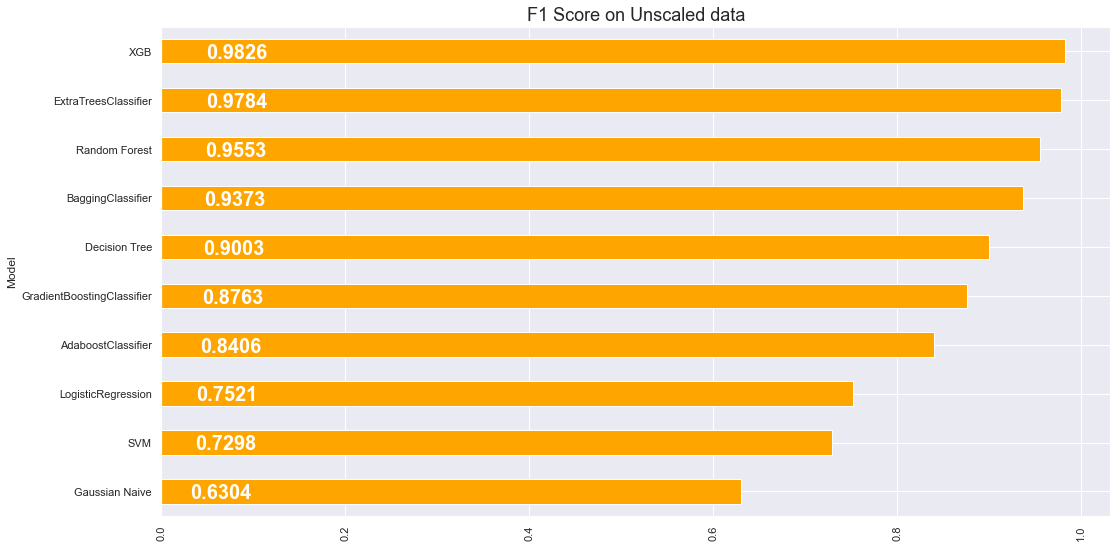

In [149]:
train_unsc.set_index('Model',inplace=True)
ax = train_unsc['f1-Score'].sort_values().round(6).plot(kind = 'barh', color = 'orange', figsize = (17,9));
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()*0.05, i.get_y()+0.1, \
            str(round((i.get_width()), 4)), fontsize=20,
color='white', fontweight = 'bold')
    
plt.title('F1 Score on Unscaled data', fontsize = 18)
plt.xticks(rotation = 90)
plt.show();

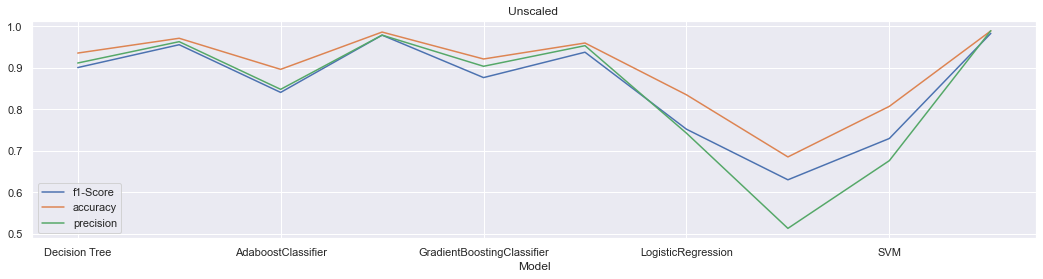

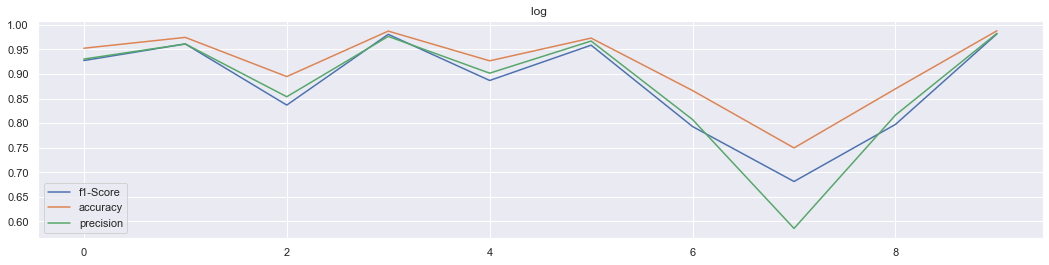

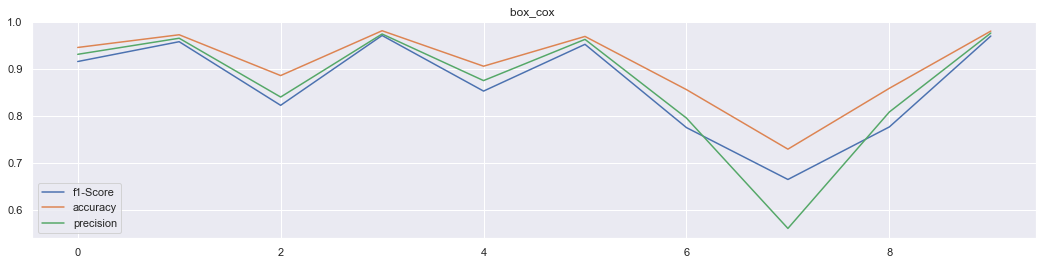

In [150]:
train_unsc.plot(figsize=(18, 4))
plt.title("Unscaled ")

train_log.plot(figsize=(18, 4))
plt.title("log ")   
    
train_bx.plot(figsize=(18, 4))
plt.title("box_cox ")
plt.show()

## Feature Importance Analyse

XGB model is having better performance. Log transform or boxcox transform is slightly improving the performance.

The following models can be further analysed for comparing feature importance on different transformed data.


In [151]:
# Compare feature on unscaled and box cox data
_,xgb_unsc = modeltrain(X_unscaled,y_unscaled,xgb)
xgb_unsc.feature_importances_

array([0.1757192 , 0.02060995, 0.01782676, 0.00885643, 0.01775971,
       0.0246231 , 0.02618534, 0.04279151, 0.01585562, 0.02259142,
       0.01851721, 0.0253462 , 0.01385726, 0.03262424, 0.03976912,
       0.03294795, 0.05786214, 0.02614741, 0.02168289, 0.02741786,
       0.05609145, 0.02509428, 0.0176306 , 0.18231042, 0.04988193,
       0.        ], dtype=float32)

<AxesSubplot:>

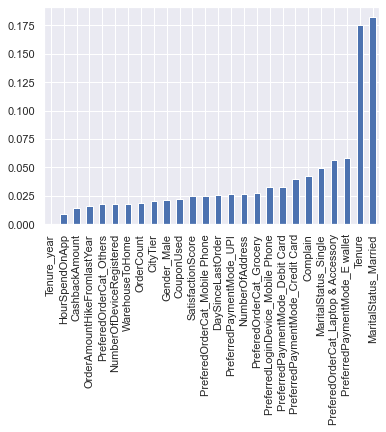

In [152]:
pd.Series(xgb_unsc.feature_importances_,index = X_unscaled.columns).sort_values().plot(kind ='bar')

<AxesSubplot:>

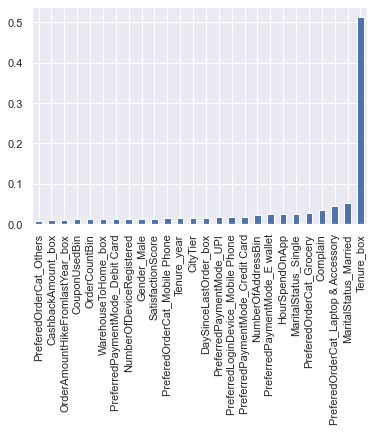

In [153]:
_,xgb_bx = modeltrain(X_bx,y_bx,xgb)
pd.Series(xgb_bx.feature_importances_,index = X_bx.columns).sort_values().plot(kind ='bar')

<AxesSubplot:>

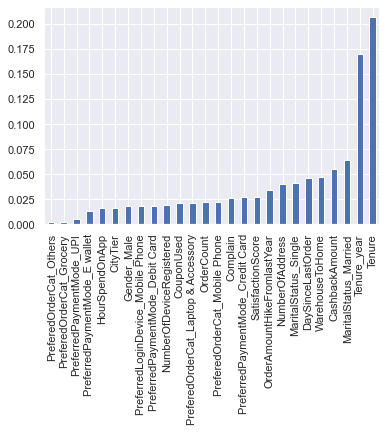

In [154]:
# Random forest  is also having good scores on unscaled and log with slight variations.
_,rfc_unsc = modeltrain(X_unscaled,y_unscaled,rfc)
pd.Series(rfc_unsc.feature_importances_,index = X_unscaled.columns).sort_values().plot(kind ='bar')

<AxesSubplot:>

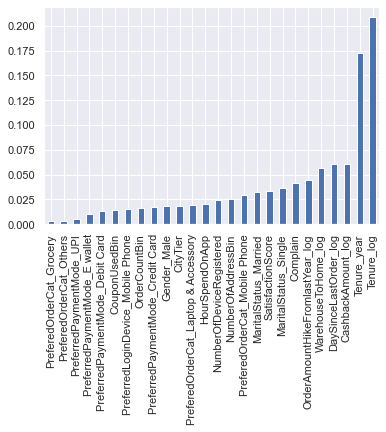

In [155]:
_,rfc_log = modeltrain(X_log,y_log,rfc)
pd.Series(rfc_log.feature_importances_,index = X_log.columns).sort_values().plot(kind ='bar')

XGB with unscaled data can be used as final model. Scaling is giving too high feature importance to one particular feature .

## HyperParameter Tuning

In [156]:
#Hyperparameter Tuning
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]  
}

In [157]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

random_search=RandomizedSearchCV(xgb,
                                 param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [158]:
random_search.fit(X_unscaled,y_unscaled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='error', gamma=0,
                                           gpu_id=-1, grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=2...
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_lambda=1, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [159]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=8, max_leaves=0,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [160]:
xgb=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=10, max_leaves=0,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1)

In [161]:
x_train,x_test,y_train,y_test=train_test_split(X_unscaled, y_unscaled,test_size=0.2,random_state=42)
model= xgb.fit(x_train,y_train)

In [162]:
y_pred = model.predict(x_test)

In [163]:
f=f1_score(y_test, y_pred)

In [164]:
f

0.9749182115594329

In [165]:
joblib.dump(model,'xgb_model.sav')

['xgb_model.sav']

In [168]:
x_train.shape

(5618, 26)

In [170]:
x_train.columns

Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_Credit Card',
       'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Tenure_year'],
      dtype='object')

In [173]:
df_enc.iloc[0]

Churn                                    1.000000
Tenure                                   4.000000
CityTier                                 3.000000
WarehouseToHome                          6.000000
HourSpendOnApp                           3.000000
NumberOfDeviceRegistered                 3.000000
SatisfactionScore                        2.000000
NumberOfAddress                          9.000000
Complain                                 1.000000
OrderAmountHikeFromlastYear             11.000000
CouponUsed                               1.000000
OrderCount                               1.000000
DaySinceLastOrder                        5.000000
CashbackAmount                         159.930000
PreferredLoginDevice_Mobile Phone        1.000000
PreferredPaymentMode_Credit Card         0.000000
PreferredPaymentMode_Debit Card          1.000000
PreferredPaymentMode_E wallet            0.000000
PreferredPaymentMode_UPI                 0.000000
Gender_Male                              0.000000
